# Nền tảng lý thuyết của tối ưu hóa

## Tối ưu hóa và hàm mất mát

Trong học có giám sát, sai số huấn luyện (hoặc rủi ro thực nghiệm) đo mức độ sai lệch giữa dự đoán của mô hình và nhãn thực tế, được định nghĩa:

$$R_{\textrm{emp}}[\mathbf{X}, \mathbf{y}, f] = \frac{1}{n} \sum_{i=1}^n l(\mathbf{x}^{(i)}, y^{(i)}, f(\mathbf{x}^{(i)}))$$

Trong đó:

- $R_{\textrm{emp}}$: Rủi ro thực nghiệm được tính trên tập huấn luyện
- $l(...)$: Hàm mất mát đo sự khác biệt giữa dự đoán và nhãn thực tế
- $f(\mathbf{x}^{(i)})$: Dự đoán của mô hình cho đầu vào $\mathbf{x}^{(i)}$
- $n$: Số lượng mẫu huấn luyện

Mục tiêu tối ưu hóa là cực tiểu hóa $R_{\textrm{emp}}$ (empirical risk), nhưng mục tiêu cuối cùng là tìm mô hình tổng quát hóa tốt với rủi ro thực (true risk), tránh hiện tượng quá khớp khi khoảng cách giữa hai rủi ro này quá lớn.

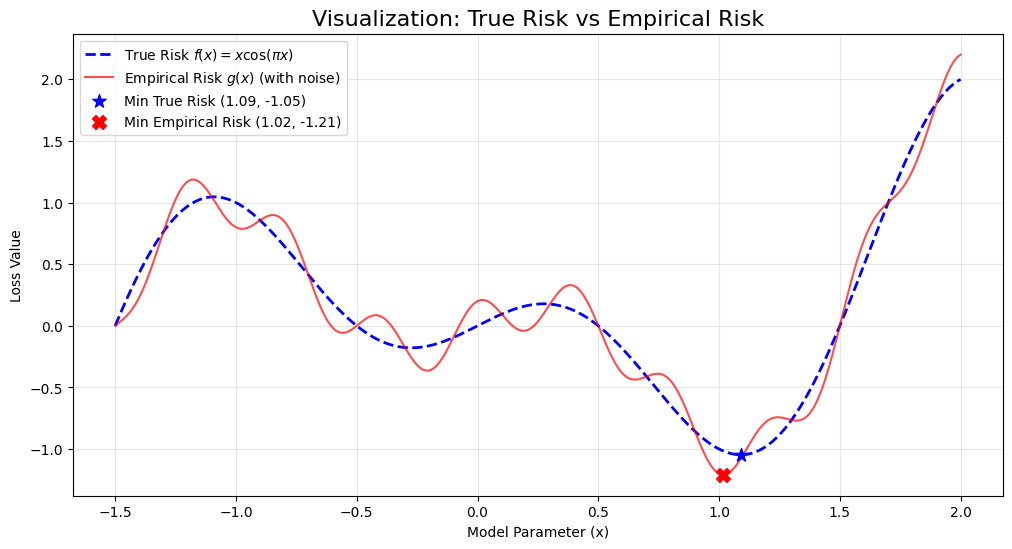

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def true_risk_f(x):
    """
    True Risk function: f(x) = x * cos(pi * x)
    """
    return x * np.cos(np.pi * x)

def empirical_risk_g(x):
    """
    Empirical Risk function: g(x) = f(x) + 0.2 * cos(5 * pi * x)
    """
    # Add noise to f(x)
    noise = 0.2 * np.cos(5 * np.pi * x)
    return true_risk_f(x) + noise

# Create x values range
x = np.linspace(-1.5, 2.0, 1000)

# Calculate y values
y_true = true_risk_f(x)
y_empirical = empirical_risk_g(x)

# Find minima
min_idx_true = np.argmin(y_true)
min_idx_emp = np.argmin(y_empirical)

x_min_true, y_min_true = x[min_idx_true], y_true[min_idx_true]
x_min_emp, y_min_emp = x[min_idx_emp], y_empirical[min_idx_emp]

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(x, y_true, label=r'True Risk $f(x) = x \cos(\pi x)$', color='blue', linestyle='--', linewidth=2)
plt.plot(x, y_empirical, label=r'Empirical Risk $g(x)$ (with noise)', color='red', alpha=0.7, linewidth=1.5)

# Mark the minima
plt.scatter(x_min_true, y_min_true, color='blue', s=100, zorder=5, marker='*',
            label=f'Min True Risk ({x_min_true:.2f}, {y_min_true:.2f})')
plt.scatter(x_min_emp, y_min_emp, color='red', s=100, zorder=5, marker='X',
            label=f'Min Empirical Risk ({x_min_emp:.2f}, {y_min_emp:.2f})')

plt.title('Visualization: True Risk vs Empirical Risk', fontsize=16)
plt.xlabel('Model Parameter (x)')
plt.ylabel('Loss Value')
plt.legend(loc='upper left')
plt.grid(True, alpha=0.3)
plt.show()

**Hình ảnh**: So sánh True Risk và Empirical Risk minh họa khoảng cách tổng quát hóa  
_(Note: Original figure reference: `Images/empirical_risk_gen_risk.png`)_

## Gradient

**Định nghĩa:** Gradient của một hàm đa biến là vector chứa các đạo hàm riêng phần cấp một, chỉ hướng tăng nhanh nhất của hàm số.

Đối với hàm mất mát $L(\mathbf{w})$, gradient được xác định:

$$\nabla L(\mathbf{w}) = \left[ \frac{\partial L}{\partial w_1}, \frac{\partial L}{\partial w_2}, \dots, \frac{\partial L}{\partial w_n} \right]^T$$

**Ví dụ:** Với hàm $f(x, y) = x^{2} + y^{2}$, vector gradient là $\nabla f = [2x, 2y]^T$.

Bề mặt paraboloid này có **gradient hướng ra xa tâm**. Trong Gradient Descent, ta di chuyển ngược hướng gradient (xuống dốc) để giảm thiểu hàm mục tiêu. Tại cực tiểu toàn cục $(0,0)$, gradient bằng 0.

_(Note: Original had TikZ 3D plot visualization)_

## Ma trận Hessian

**Định nghĩa:** Ma trận Hessian là ma trận vuông chứa các đạo hàm riêng cấp hai, mô tả độ cong (curvature) của hàm số:

$$H_{ij} = \frac{\partial^{2} f}{\partial x_i \partial x_j}$$

Tại điểm tới hạn (nơi $\nabla f = 0$), Hessian phân loại điểm đó:

- $H$ xác định dương ($\det(H) > 0, H_{11} > 0$): Cực tiểu cục bộ
- $H$ xác định âm ($\det(H) > 0, H_{11} < 0$): Cực đại cục bộ
- $H$ không xác định (có cả giá trị riêng dương và âm): Điểm yên ngựa

### Ví dụ: Kiểm tra điểm $P(1,1)$ của hàm $f(x,y) = x^{3} + y^{3} - 3xy$

**Bước 1 - Đạo hàm bậc nhất:**

$$f_x = 3x^{2} - 3y, \quad f_y = 3y^{2} - 3x$$

**Bước 2 - Ma trận Hessian:**

$$H(x,y) = \begin{bmatrix}
6x & -3 \\
-3 & 6y
\end{bmatrix}$$

**Bước 3 - Tại $P(1,1)$:**

$$H(1,1) = \begin{bmatrix}
6 & -3 \\
-3 & 6
\end{bmatrix}$$

**Bước 4 - Phân loại:**

- $D_1 = 6 > 0$
- $D_2 = \det(H) = 36 - 9 = 27 > 0$

**Kết luận:** Vì $D_1 > 0$ và $D_2 > 0$, ma trận Hessian xác định dương, nên $P(1,1)$ là điểm cực tiểu cục bộ.

## Các thách thức chính trong tối ưu hóa

### Cực tiểu địa phương (Local Minima)

Thuật toán bị mắc kẹt tại điểm có gradient $\nabla L \approx 0$ nhưng chưa đạt cực tiểu toàn cục.

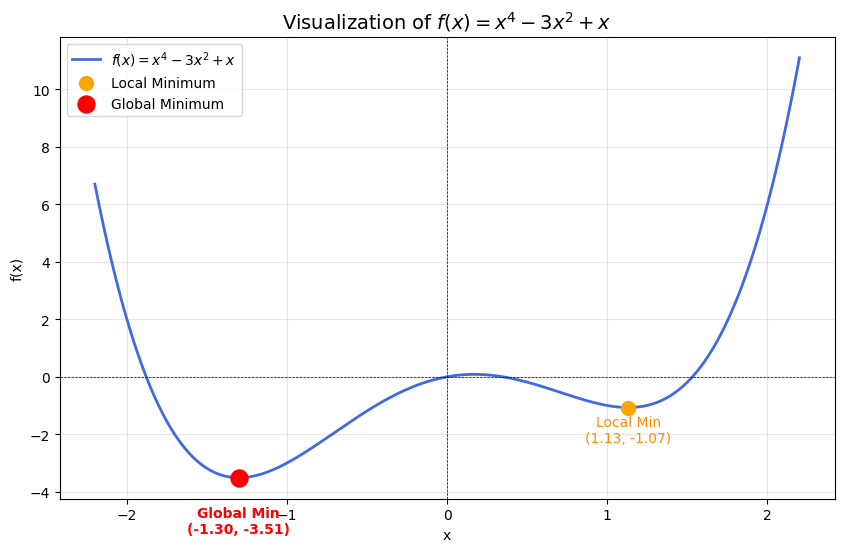

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_function():
    # 1. Định nghĩa hàm số
    def f(x):
        return x**4 - 3*x**2 + x

    # 2. Tìm các điểm cực trị
    # Đạo hàm f'(x) = 4x^3 - 6x + 1
    # Hệ số của đa thức đạo hàm: [4, 0, -6, 1]
    coeffs = [4, 0, -6, 1]
    roots = np.roots(coeffs)  # Tìm nghiệm của đạo hàm

    # Lọc lấy các nghiệm thực
    real_roots = roots[np.isreal(roots)].real

    # Phân loại cực trị (tìm Minimum)
    # Đạo hàm bậc hai f''(x) = 12x^2 - 6
    minima_x = []
    minima_y = []
    for r in real_roots:
        second_derivative = 12 * r**2 - 6
        if second_derivative > 0:  # Điều kiện cực tiểu
            minima_x.append(r)
            minima_y.append(f(r))

    # 3. Xác định Global Minimum
    minima_y = np.array(minima_y)
    minima_x = np.array(minima_x)
    global_min_idx = np.argmin(minima_y)
    global_min_x = minima_x[global_min_idx]
    global_min_y = minima_y[global_min_idx]

    # 4. Vẽ đồ thị
    x = np.linspace(-2.2, 2.2, 500)
    y = f(x)

    plt.figure(figsize=(10, 6))
    plt.plot(x, y, label='$f(x) = x^4 - 3x^2 + x$', color='royalblue', linewidth=2)

    # Vẽ các điểm Local Minimum (màu cam)
    # Lưu ý: Global Min cũng là một Local Min, nhưng ta sẽ vẽ đè lên bằng màu đỏ
    for mx, my in zip(minima_x, minima_y):
        if mx != global_min_x:
            plt.scatter(mx, my, color='orange', s=100, zorder=5, label='Local Minimum')
            plt.annotate(f'Local Min\n({mx:.2f}, {my:.2f})',
                        (mx, my), textcoords="offset points", xytext=(0,-25),
                        ha='center', color='darkorange')

    # Vẽ điểm Global Minimum (màu đỏ)
    plt.scatter(global_min_x, global_min_y, color='red', s=150, zorder=10, label='Global Minimum')
    plt.annotate(f'Global Min\n({global_min_x:.2f}, {global_min_y:.2f})',
                (global_min_x, global_min_y), textcoords="offset points", xytext=(0,-40),
                ha='center', color='red', fontweight='bold')

    # Trang trí đồ thị
    plt.title('Visualization of $f(x) = x^4 - 3x^2 + x$', fontsize=14)
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
    plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

if __name__ == "__main__":
    visualize_function()

**Hình ảnh**: Hàm $f(x) = x^4 - 3x^2 + x$ minh họa cực tiểu địa phương và toàn cục  
_(Note: Original figure reference: `Images/local-minima.png`)_

### Điểm yên ngựa (Saddle Points)

Tại điểm yên ngựa, gradient bằng 0 nhưng không phải cực trị—bề mặt cong lên theo một hướng và cong xuống theo hướng khác. Gradient rất nhỏ gần điểm này làm thuật toán di chuyển cực chậm.

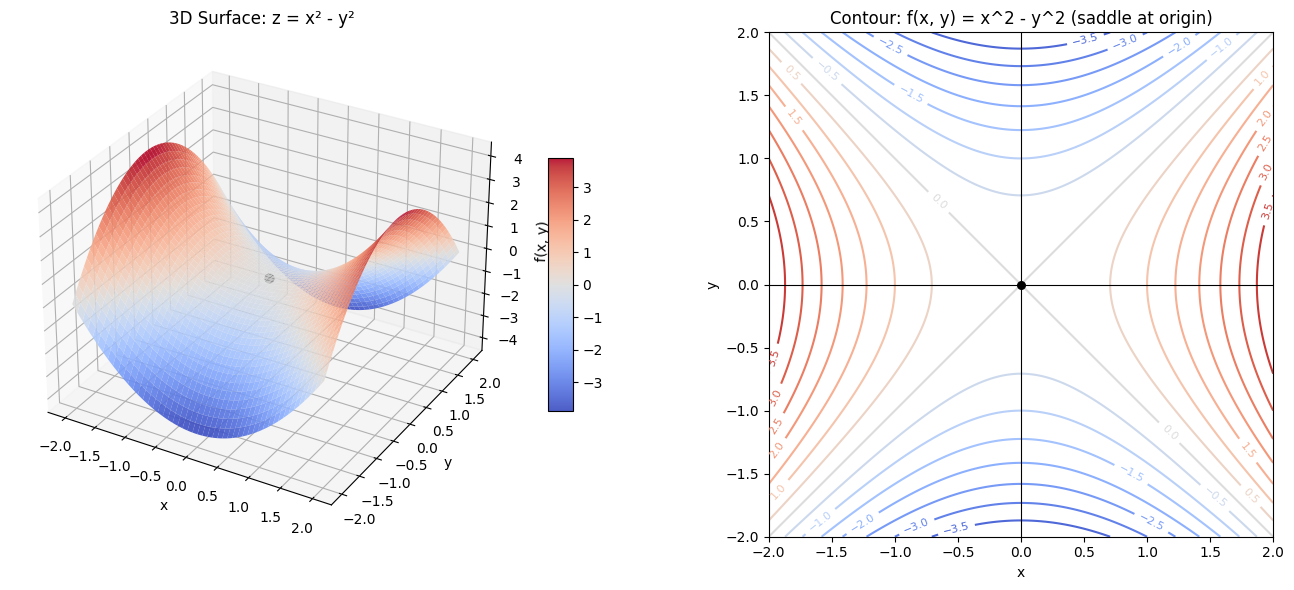

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define grid
x = np.linspace(-2, 2, 200)
y = np.linspace(-2, 2, 200)
X, Y = np.meshgrid(x, y)
Z = X**2 - Y**2

# Create figure with side-by-side subplots
fig = plt.figure(figsize=(14, 6))

# Left subplot: 3D surface
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
surf = ax1.plot_surface(X, Y, Z, cmap='coolwarm', linewidth=0, antialiased=True, alpha=0.9)
ax1.scatter(0, 0, 0, color='k', s=40, label='Saddle point')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('f(x, y)')
ax1.set_title('3D Surface: z = x² - y²')
fig.colorbar(surf, ax=ax1, shrink=0.5, aspect=10)

# Right subplot: Contour plot
ax2 = fig.add_subplot(1, 2, 2)
levels = np.linspace(-4, 4, 17)
cs = ax2.contour(X, Y, Z, levels=levels, cmap='coolwarm')
ax2.clabel(cs, inline=True, fontsize=8)
ax2.axhline(0, color='black', linewidth=0.8)
ax2.axvline(0, color='black', linewidth=0.8)
ax2.scatter(0, 0, color='k', s=30, zorder=5)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('Contour: f(x, y) = x^2 - y^2 (saddle at origin)')
ax2.set_aspect('equal', adjustable='box')

plt.tight_layout()
plt.show()


### Ví dụ phân tích: Hàm $f(x, y) = x^2 - y^2$ tại điểm $(0, 0)$

1. **Gradient:** $\nabla f = [2x, -2y]^T$. Tại $(0,0)$: $\nabla f = \mathbf{0}$ (điểm dừng)

2. **Ma trận Hessian:**
   $$H = \begin{bmatrix}
   2 & 0 \\
   0 & -2
   \end{bmatrix}$$

3. **Giá trị riêng:** $\lambda_1 = 2 > 0$, $\lambda_2 = -2 < 0$

**Kết luận:** Ma trận không xác định (có cả giá trị riêng dương và âm) xác nhận $(0,0)$ là điểm yên ngựa.

**Hình ảnh**: Hình yên ngựa của $f(x,y) = x^2 - y^2$ với điểm tới hạn tại gốc tọa độ  
_(Note: Original figure reference: `Images/saddle-point-2.png`)_

### Triệt tiêu Gradient (Vanishing Gradient)

Gradient giảm dần về 0 khi lan truyền ngược qua nhiều lớp sâu, do tích của nhiều đạo hàm nhỏ (ví dụ: Sigmoid có đạo hàm tối đa $0.25$).

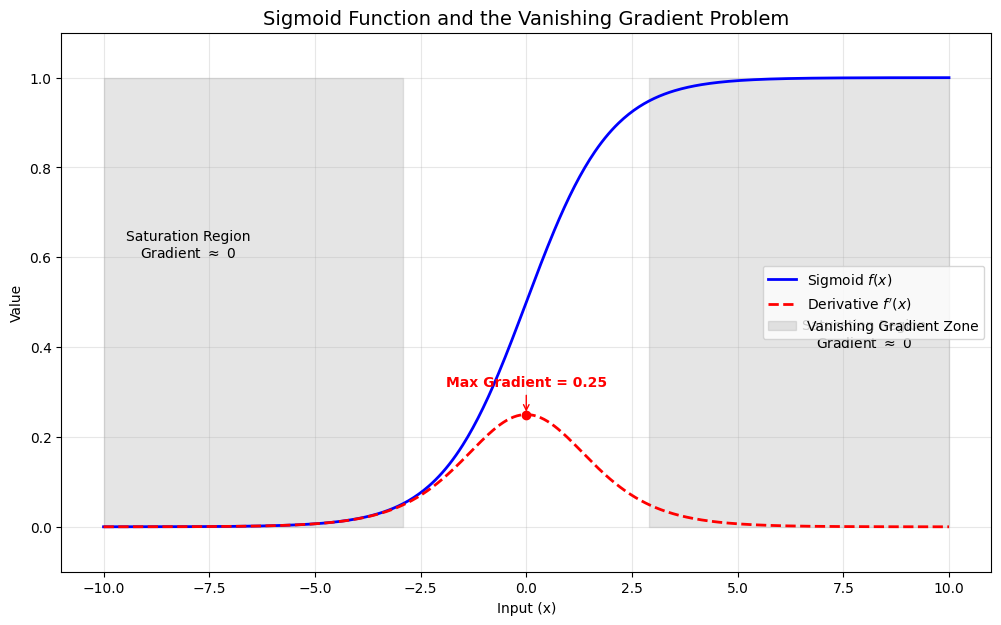

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_sigmoid_vanishing_gradient():
    # 1. Định nghĩa hàm Sigmoid và Đạo hàm
    def sigmoid(x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(x):
        s = sigmoid(x)
        return s * (1 - s)

    # 2. Tạo dữ liệu
    # Chọn khoảng rộng (-10, 10) để thấy rõ vùng bão hòa (saturation)
    x = np.linspace(-10, 10, 500)
    y = sigmoid(x)
    dy = sigmoid_derivative(x)

    plt.figure(figsize=(12, 7))

    # 3. Vẽ hàm Sigmoid (Màu xanh)
    plt.plot(x, y, label='Sigmoid $f(x)$', color='blue', linewidth=2)

    # 4. Vẽ Đạo hàm (Màu đỏ - Nét đứt)
    plt.plot(x, dy, label="Derivative $f'(x)$", color='red', linewidth=2, linestyle='--')

    # 5. Tô màu vùng "Triệt tiêu Gradient" (Vanishing Gradient Zones)
    # Giả sử vùng nguy hiểm là khi đạo hàm < 0.05 (tương ứng x < -4 hoặc x > 4)
    mask_vanish = dy < 0.05
    plt.fill_between(x, 0, 1, where=mask_vanish, color='gray', alpha=0.2, label='Vanishing Gradient Zone')

    # 6. Chú thích các điểm quan trọng
    # Max đạo hàm tại x=0
    max_grad = 0.25
    plt.scatter(0, max_grad, color='red', zorder=10)
    plt.annotate(f'Max Gradient = {max_grad}',
                (0, max_grad), xytext=(0, 20), textcoords='offset points',
                ha='center', color='red', fontweight='bold', arrowprops=dict(arrowstyle='->', color='red'))

    # Chú thích vùng bão hòa
    plt.text(-8, 0.6, "Saturation Region\nGradient $\\approx$ 0", ha='center', color='black')
    plt.text(8, 0.4, "Saturation Region\nGradient $\\approx$ 0", ha='center', color='black')

    plt.title('Sigmoid Function and the Vanishing Gradient Problem', fontsize=14)
    plt.xlabel('Input (x)')
    plt.ylabel('Value')
    plt.ylim(-0.1, 1.1)
    plt.grid(True, alpha=0.3)
    plt.legend(loc='center right')
    plt.show()

if __name__ == "__main__":
    visualize_sigmoid_vanishing_gradient()

# Các Thuật Toán Nền Tảng và Hạn Chế

Phần này trình bày các thuật toán gradient descent nền tảng và những hạn chế khi áp dụng vào các bài toán thực tế, đặc biệt trong bối cảnh dữ liệu thưa (sparse data) như đối với bộ dữ liệu RCV1.

## Giới thiệu bộ dữ liệu RCV1

### Giới thiệu Tổng quan

**RCV1 (Reuters Corpus Volume 1)** là bộ dữ liệu chuẩn (benchmark dataset) được sử dụng rộng rãi trong nghiên cứu Machine Learning, đặc biệt cho các bài toán phân loại văn bản và phân tích dữ liệu thưa (sparse data analysis).

Bộ dữ liệu này được thu thập và công bố bởi Reuters, bao gồm hơn 800,000 bài báo tiếng Anh được xuất bản bởi hãng thông tấn Reuters trong khoảng thời gian từ tháng 8/1996 đến 8/1997. Mỗi bài báo được gán nhãn với một hoặc nhiều chủ đề từ hệ thống phân loại dạng phân cấp của Reuters.

### Thống kê đặc trưng của bộ dữ liệu RCV1

| Đặc điểm | Training Set | Test Set | Tổng |
|---|---|---|---|
| **Số documents** | 23,149 | 781,265 | 804,414 |
| **Số features (terms)** | 47,236 | 47,236 | 47,236 |
| **Số topics/categories** | 103 | 103 | 103 |
| **Kích thước ma trận** | 23,149 $\times$ 47,236 | 781,265 $\times$ 47,236 | - |
| **Số phần tử khác 0** | ~1,500,000 | ~49,000,000 | ~50,500,000 |
| **Sparsity (độ thưa)** | 99.86% | 99.87% | ~99.87% |

### Biểu diễn Dữ liệu

Feature Representation: Bag-of-Words (BoW) với TF-IDF weighting.

Mỗi document $d$ được biểu diễn bởi vector:

$$\mathbf{x}_d = [x_1, x_2, \ldots, x_{47236}]$$

trong đó:

$$x_i = \text{TF-IDF}(term_i, d) = \text{TF}(term_i, d) \times \text{IDF}(term_i)$$

với:

- $\text{TF}(term_i, d)$: Term Frequency — tần suất xuất hiện của từ $i$ trong document $d$
- $\text{IDF}(term_i) = \log \frac{N}{df(term_i)}$: Inverse Document Frequency
  - $N$: Tổng số documents
  - $df(term_i)$: Số documents chứa $term_i$

**Đặc điểm sparse:**

- Mỗi document thường chỉ chứa khoảng 200–400 từ khác nhau.
- Trong 47,236 features, chỉ khoảng 0.5–1% có giá trị khác 0 cho mỗi document.
- Phần lớn (khoảng 99%) các phần tử trong vector có giá trị bằng 0.

### Dữ liệu thưa (Sparse Features) là gì?

Dữ liệu thưa là dữ liệu mà hầu hết các giá trị là 0, các features xuất hiện không thường xuyên (infrequent features). Đây là đặc trưng phổ biến trong nhiều bài toán thực tế:

- **Xử lý ngôn ngữ tự nhiên (NLP):** Trong mô hình Bag-of-Words, từ "preconditioning" xuất hiện ít hơn rất nhiều so với từ "learning".
- **Quảng cáo tính toán (Computational Advertising):** Các sản phẩm/quảng cáo cụ thể chỉ được một nhóm nhỏ người dùng quan tâm.
- **Hệ thống gợi ý (Collaborative Filtering):** Mỗi user chỉ tương tác với một phần rất nhỏ trong tổng số items.

## Gradient Descent (GD)

**Ý tưởng:** Cập nhật tham số mô hình dựa trên gradient của hàm mất mát tính trên toàn bộ tập dữ liệu training.

**Công thức cập nhật:**

$$\mathbf{x} \leftarrow \mathbf{x} - \eta \nabla f(\mathbf{x})$$

Trong đó:

- $\mathbf{x}$ là vector tham số cần tối ưu
- $\eta$ là learning rate (tốc độ học)
- $\nabla f(\mathbf{x})$ là gradient của hàm mục tiêu tại điểm $\mathbf{x}$

**Vấn đề:**

- Chi phí tính toán cực lớn: phải duyệt qua toàn bộ $n$ mẫu để tính gradient cho mỗi bước cập nhật duy nhất.
- Tốn bộ nhớ khi $n$ lớn (như RCV1 với 804,414 mẫu $\times$ 47,236 features).
- Tốc độ cập nhật chậm (1 lần/epoch), không tận dụng được random fluctuation.

In [ ]:
def train_gd_visualize(X_sparse, y_tensor, lr=0.5, epochs=20):
    W = torch.normal(0, 0.01, size=(n_features, 1), requires_grad=True, device=device)
    b = torch.zeros(1, requires_grad=True, device=device)
    criterion = nn.BCEWithLogitsLoss()
    epoch_losses = []

    print(f"\nStarting Training Gradient Descent (Full Batch)...")
    print(f"Total samples: {n_samples} | Updates per epoch: 1")
    print("="*70)

    start_time = time.time()
    for epoch in range(epochs):
        epoch_start = time.time()

        linear_out = torch.sparse.mm(X_sparse, W) + b
        loss = criterion(linear_out, y_tensor)
        loss.backward()

        # Update parameters (GD update)
        with torch.no_grad():
            W -= lr * W.grad
            b -= lr * b.grad
            W.grad.zero_()
            b.grad.zero_()

        current_loss = loss.item()
        epoch_losses.append(current_loss)
        epoch_time = time.time() - epoch_start

        if epoch % 5 == 0 or epoch == epochs - 1:
            print(f"Epoch {epoch+1:3d}/{epochs} | Loss: {current_loss:.6f} | "
                  f"Time: {epoch_time:.2f}s")

        if current_loss < 1e-5:
            print(f"\n✓ Converged at epoch {epoch+1}!")
            break

    total_time = time.time() - start_time
    print("="*70)
    print(f" Training Complete!")
    print(f" Total time: {total_time:.2f}s")
    print(f" Avg time/epoch: {total_time/len(epoch_losses):.2f}s")
    print(f" Total updates: {len(epoch_losses)}")
    print(f" Final loss: {epoch_losses[-1]:.6f}")

    return epoch_losses

## Stochastic Gradient Descent (SGD)

**Ý tưởng chung:** Thay vì tính gradient trên toàn bộ dữ liệu như GD, SGD và các biến thể của nó cập nhật tham số dựa trên gradient của một phần nhỏ dữ liệu được chọn ngẫu nhiên. Điều này giúp tăng tốc độ tính toán và khả năng tổng quát hóa.

### Stochastic Gradient Descent

**Công thức cập nhật:**

$$\mathbf{x} \leftarrow \mathbf{x} - \eta \nabla f_i(\mathbf{x})$$

**Trong đó:**

- $\mathbf{x}$ là vector tham số cần tối ưu
- $\eta > 0$ là learning rate (tốc độ học)
- $\nabla f_i(\mathbf{x})$ là gradient của hàm loss tại mẫu thứ $i$
- $i \in \{1, \ldots, n\}$ được chọn ngẫu nhiên từ tập training

**Đặc điểm:**

- Cập nhật rất nhanh (chỉ xử lý 1 mẫu/bước).
- Gradient dao động mạnh (high variance) do chỉ dựa vào 1 mẫu.
- Đường đi đến minimum có dạng "zigzag".
- Khả năng thoát local minima nhờ "nhiễu" ngẫu nhiên.

Device: cuda
Downloading/Loading RCV1...
Đang vẽ biểu đồ toàn bộ quá trình...
Bắt đầu Training Pure SGD (Total samples: 23149)...
Epoch 1 | Sample 0/23149 | Current Loss: 0.6843
Epoch 1 | Sample 5000/23149 | Current Loss: 0.5756
Epoch 1 | Sample 10000/23149 | Current Loss: 0.6570
Epoch 1 | Sample 15000/23149 | Current Loss: 0.5148
Epoch 1 | Sample 20000/23149 | Current Loss: 0.4095
--> Kết thúc Epoch 1
Epoch 2 | Sample 0/23149 | Current Loss: 0.4474
Epoch 2 | Sample 5000/23149 | Current Loss: 0.7594
Epoch 2 | Sample 10000/23149 | Current Loss: 0.3345
Epoch 2 | Sample 15000/23149 | Current Loss: 0.6072
Epoch 2 | Sample 20000/23149 | Current Loss: 0.8333
--> Kết thúc Epoch 2
Epoch 3 | Sample 0/23149 | Current Loss: 0.5213
Epoch 3 | Sample 5000/23149 | Current Loss: 0.3478
Epoch 3 | Sample 10000/23149 | Current Loss: 0.1534
Epoch 3 | Sample 15000/23149 | Current Loss: 0.5065
Epoch 3 | Sample 20000/23149 | Current Loss: 0.3991
--> Kết thúc Epoch 3
Epoch 4 | Sample 0/23149 | Current Loss: 0

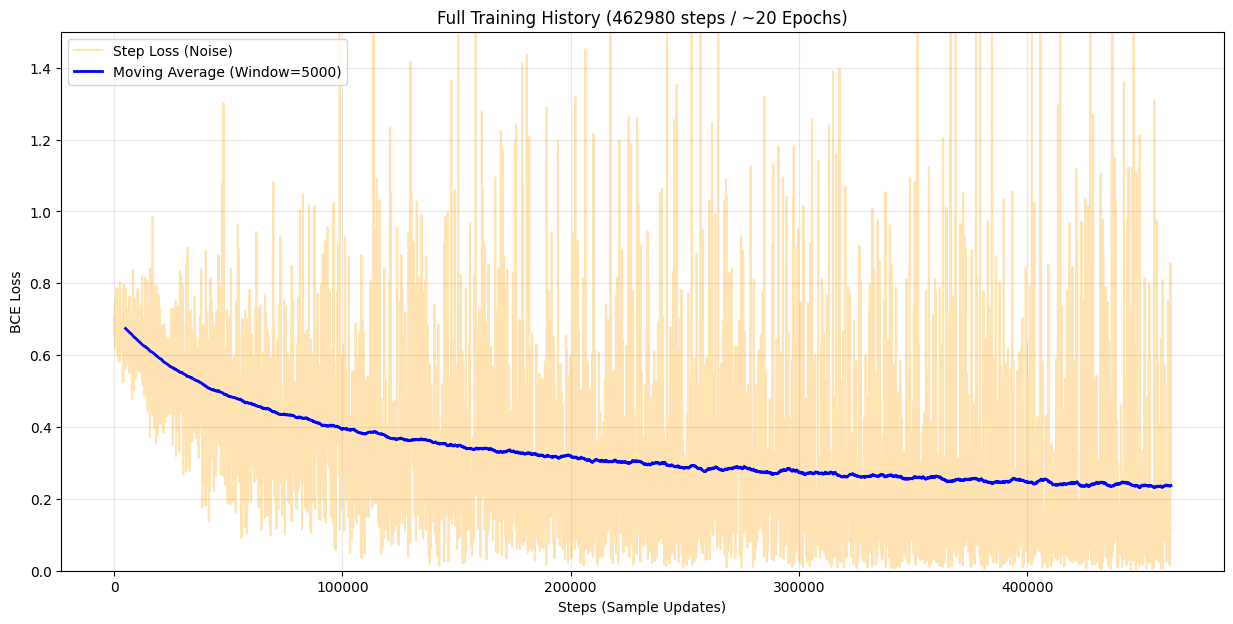

In [ ]:
import torch
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_rcv1
import torch.nn as nn
from sklearn.datasets import clear_data_home

clear_data_home()

# 1. Setup & Load Data
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Device: {device}")

print("Downloading/Loading RCV1...")
rcv1 = fetch_rcv1(subset='train')
n_samples, n_features = rcv1.data.shape

# Xử lý nhãn
topic_counts = rcv1.target.sum(axis=0)
most_frequent_topic_idx = np.argmax(topic_counts)
y_full = rcv1.target[:, most_frequent_topic_idx].toarray().ravel()
y_cpu = torch.tensor(y_full, dtype=torch.float32).view(-1, 1)

# 2. Hàm Train SGD có ghi Log và In tiến độ
def train_sgd_visualize(X_scipy, y_cpu, lr=0.01, epochs=1):
    # Khởi tạo tham số
    W = torch.normal(0, 0.01, size=(n_features, 1), requires_grad=True, device=device)
    b = torch.zeros(1, requires_grad=True, device=device)
    criterion = nn.BCEWithLogitsLoss()
    step_losses = []

    print(f"Bắt đầu Training Pure SGD (Total samples: {n_samples})...")
    start_time = time.time()

    for epoch in range(epochs):
        indices = np.random.permutation(n_samples)
        for i, idx in enumerate(indices):
            # Lấy 1 mẫu (Batch size = 1)
            X_sample = torch.tensor(X_scipy[idx].toarray(), dtype=torch.float32).to(device)
            y_sample = y_cpu[idx].to(device).view(1, 1)

            # Forward & Loss
            linear_out = X_sample @ W + b
            loss = criterion(linear_out, y_sample)

            # Backward & Update
            loss.backward()
            with torch.no_grad():
                W -= lr * W.grad
                b -= lr * b.grad
                W.grad.zero_()
                b.grad.zero_()

            # Lưu lại loss
            current_loss = loss.item()
            step_losses.append(current_loss)

            # --- PHẦN BẠN CẦN: IN TIẾN ĐỘ & LOSS ---
            # In ra mỗi 1000 samples để theo dõi
            if i % 5000 == 0:
                print(f"Epoch {epoch+1} | Sample {i}/{n_samples} | Current Loss: {current_loss:.4f}")

        print(f"--> Kết thúc Epoch {epoch+1}")

    print(f"Tổng thời gian: {time.time() - start_time:.2f}s")
    return step_losses

# 3. Hàm Visualize (Vẽ biểu đồ Nhiễu vs Xu hướng)
def plot_full_training_history(losses, window_size=1000, downsample_rate=100):
    """
    Vẽ toàn bộ quá trình huấn luyện bằng cách giảm số lượng điểm vẽ (Downsampling).
    Input:
        losses: List chứa toàn bộ history (khoảng 460k điểm)
        window_size: Kích thước cửa sổ Moving Average
        downsample_rate: Vẽ 1 điểm cho mỗi n bước (để biểu đồ nhẹ hơn)
    """
    plt.figure(figsize=(15, 7))
    total_steps = len(losses)

    # 1. Vẽ Loss thực tế (Downsampling để không bị dày đặc quá)
    # Lấy bước nhảy là downsample_rate
    steps = range(0, total_steps, downsample_rate)
    sampled_losses = [losses[i] for i in steps]
    plt.plot(steps, sampled_losses, color='orange', alpha=0.3, label='Step Loss (Noise)')

    # 2. Vẽ Moving Average cho TOÀN BỘ quá trình
    # Tính trên dữ liệu gốc để chính xác, sau đó mới vẽ
    if total_steps > window_size:
        # Tính Moving Average
        moving_avg = np.convolve(losses, np.ones(window_size)/window_size, mode='valid')

        # Trục x cho moving average (căn chỉnh về cuối cửa sổ)
        ma_x_axis = range(window_size-1, total_steps)

        # Downsample đường Moving Average để vẽ cho nhanh (tùy chọn)
        # Vì đường này mượt nên có thể vẽ hết hoặc downsample ít hơn
        plt.plot(ma_x_axis[::downsample_rate], moving_avg[::downsample_rate],
                color='blue', linewidth=2, label=f'Moving Average (Window={window_size})')

    plt.title(f'Full Training History ({total_steps} steps / ~{total_steps//23149} Epochs)')
    plt.xlabel('Steps (Sample Updates)')
    plt.ylabel('BCE Loss')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Giới hạn trục Y để loại bỏ các điểm nhiễu quá lớn (outliers)
    plt.ylim(0, 1.5)
    plt.show()

# --- SỬ DỤNG ---
print("Đang vẽ biểu đồ toàn bộ quá trình...")
# window_size lớn hơn (5000) để làm mượt đường xu hướng trên tập dữ liệu lớn
loss_history = train_sgd_visualize(rcv1.data, y_cpu, lr=0.01, epochs=20)
plot_full_training_history(loss_history, window_size=5000, downsample_rate=100)
# Mình để LR nhỏ (0.01) để loss đỡ bị nhảy quá cao

## Hạn Chế của SGD với Dữ liệu Thưa (Sparse Features)

**Trong bộ dữ liệu RCV1 đang sử dụng:**

- Input vector $\mathbf{x}$ có kích thước 47,236 chiều (số từ vựng).
- Tuy nhiên, mỗi văn bản chỉ chứa vài trăm từ khác 0 $\rightarrow$ độ thưa (sparsity) rất cao.
- Một số từ phổ biến (common features) xuất hiện trong hầu hết văn bản.
- Nhiều từ hiếm (rare/infrequent features) chỉ xuất hiện trong một vài văn bản.

### Phân tích Gradient với Dữ liệu Thưa

Xét mô hình tuyến tính đơn giản:

$$\hat{y} = \mathbf{w}^\top \mathbf{x}$$

Khi tính gradient của hàm mất mát $L$ theo trọng số $w_i$:

$$\frac{\partial L}{\partial w_i} = \frac{\partial L}{\partial \hat{y}} \cdot x_i$$

| Loại feature | Tần suất xuất hiện | Gradient | Tình trạng cập nhật |
|---|---|---|---|
| **Phổ biến (frequent)** | $x_i \neq 0$ thường xuyên | Khác 0 liên tục | $w_i$ được cập nhật liên tục |
| **Hiếm (infrequent)** | $x_i = 0$ hầu hết các mẫu | Bằng 0 phần lớn thời gian | $w_i$ hiếm khi được cập nhật |

### Vấn đề xảy ra với dữ liệu thưa của Learning Rate

**Vấn đề xảy ra với dữ liệu thưa của learning rate:**

1. **Với features phổ biến ($w_{\text{common}}$):**
   - Nhận gradient liên tục qua mọi iteration.
   - Learning rate giảm dần $\rightarrow$ hội tụ ổn định đến giá trị tối ưu.
   - Hoạt động ổn định.

2. **Với features hiếm ($w_{\text{rare}}$):**
   - Chỉ nhận gradient khác 0 khi feature xuất hiện (rất hiếm).
   - Khi feature cuối cùng xuất hiện, learning rate đã giảm quá nhiều.
   - Không còn đủ "lực" để cập nhật $w_i$ một cách có ý nghĩa.
   - Chưa hội tụ dù training đã kết thúc.

**Tóm lại:** Tốc độ học giảm quá chậm đối với các đặc trưng xuất hiện thường xuyên, hoặc quá nhanh đối với các đặc trưng xuất hiện không thường xuyên.

## Ví dụ với bộ dữ liệu RCV1

Phần này làm rõ cơ chế toán học khiến SGD với learning rate cố định không hiệu quả trên dữ liệu thưa, dẫn đến nhu cầu phát triển các thuật toán khác.

### Gradient trong Binary Classification với BCE Loss

Xét bài toán binary classification với logistic regression:

$$\hat{y} = \sigma(\mathbf{w}^\top \mathbf{x}) = \sigma\left(\sum_{j=1}^{d} w_j x_j\right)$$

trong đó $\sigma(z) = \frac{1}{1 + e^{-z}}$ là sigmoid activation function.

Binary Cross-Entropy Loss cho một mẫu $(\mathbf{x}, y)$ với $y \in \{0, 1\}$:

$$\ell(\mathbf{w}) = -\left[y \log(\hat{y}) + (1-y) \log(1-\hat{y})\right]$$

**Gradient theo từng tham số $w_j$:**

Áp dụng chain rule:

$$\frac{\partial \ell}{\partial w_j}
= \frac{\partial \ell}{\partial \hat{y}}
\cdot \frac{\partial \hat{y}}{\partial z}
\cdot \frac{\partial z}{\partial w_j}$$

với $z = \mathbf{w}^\top \mathbf{x}$.

Sau khi tính toán, ta có:

$$\frac{\partial \ell}{\partial w_j} = (\hat{y} - y) \cdot x_j$$

Trong đó:

- $(\hat{y} - y)$: Prediction error, phụ thuộc vào chất lượng dự đoán của mô hình.
- $\hat{y} = \sigma(\mathbf{w}^\top \mathbf{x}) \in (0, 1)$: Xác suất dự đoán.
- $y \in \{0, 1\}$: Nhãn thực tế.
- $x_j$: Giá trị feature thứ $j$ trong mẫu hiện tại.

**Ta thấy:**

$$\boxed{x_j = 0 \;\Rightarrow\; \frac{\partial \ell}{\partial w_j} = 0}$$

$\Rightarrow$ Tham số $w_j$ không nhận gradient từ mẫu này, do đó không được cập nhật.

Kết quả này độc lập với loss function. Miễn là model tuyến tính $\hat{y} = f(\mathbf{w}^\top \mathbf{x})$, gradient luôn tỷ lệ với $x_j$.

### Minh họa với ví dụ cụ thể

**Ví dụ:** Xét mini-batch chứa văn bản về doanh nghiệp (label $y=1$ cho CCAT).

Giả sử sau tokenization và TF-IDF encoding:

| Feature | TF-IDF | $x_j$ | Gradient | Cập nhật SGD |
|---|---|---|---|---|
| "company" | cao | $x_{\text{company}} = 0.8$ | $\neq 0$ | Cập nhật |
| "merger" | trung bình | $x_{\text{merger}} = 0.3$ | $\neq 0$ | Cập nhật |
| "reuters" | 0 (không có) | $x_{\text{reuters}} = 0$ | $0$ | Không cập nhật |
| "eigenvalue" | 0 (không có) | $x_{\text{eigenvalue}} = 0$ | $0$ | Không cập nhật |

**Hệ quả:**

- **Features phổ biến** ("company", "merger"): nhận gradient thường xuyên $\rightarrow$ học nhanh.
- **Features hiếm** ("reuters"): gradient = 0 ở hầu hết bước cập nhật $\rightarrow$ học rất chậm.

### Tần suất Cập nhật và Learning Rate Requirements

Giả sử trong RCV1 training set (23,149 documents):

- Feature "said": xuất hiện trong $\sim$15,000 documents (65%).
- Feature "preconditioning": xuất hiện trong $\sim$5 documents (0.02%).

**Sau 1,000 iterations SGD (random sampling):**

| Feature | Số lần nhận gradient $\neq 0$ | Magnitude tích lũy | LR lý tưởng |
|---|---|---|---|
| "said" | $\sim 650$ | Rất lớn | Nhỏ ($\sim 0.001$) |
| "reuters" | $\sim 0$ (có thể = 0) | Gần 0 | Lớn ($\sim 0.1$) |

**Dilemma với learning rate cố định $\eta$:**

$$\eta_{\text{SGD}} =
\begin{cases}
\text{Nhỏ (0.001)} & \Rightarrow w_{\text{common}} \text{ hội tụ ổn định, nhưng } w_{\text{rare}} \text{ học quá chậm hoặc không học} \\[6pt]
\text{Lớn (0.1)} & \Rightarrow w_{\text{rare}} \text{ có cơ hội học, nhưng } w_{\text{common}} \text{ dao động mạnh / diverge}
\end{cases}$$

**Minh họa cập nhật SGD:**

$$w_j^{(t+1)} = w_j^{(t)} - \eta \cdot (\hat{y}^{(t)} - y^{(t)}) \cdot x_j^{(t)}$$

- Nếu $x_j^{(t)} = 0$ (feature không xuất hiện): $w_j^{(t+1)} = w_j^{(t)}$ (không thay đổi).
- Feature hiếm: $x_j \neq 0$ chỉ trong $\sim$0.02% iterations $\rightarrow$ tổng cộng cập nhật $\ll$ 1,000 lần.
- Feature phổ biến: $x_j \neq 0$ trong $\sim$65% iterations $\rightarrow$ cập nhật $\sim$650 lần.

$\Rightarrow$ Chênh lệch 30,000x về số lần cập nhật!

### Sparse Gradient và Ảnh hưởng đến Optimization

Với một document trong RCV1 (trung bình 67 features khác 0 / 47,236 features):

$$\nabla \ell(\mathbf{w}) =
\begin{bmatrix}
g_1 \\
0 \\
0 \\
g_4 \\
\vdots \\
0
\end{bmatrix}
\quad\text{với}\quad
\|\nabla \ell\|_0 \approx 67 \ll 47236$$

Trong đó:

- $\|\nabla \ell\|_0$: số thành phần khác 0 (cardinality).
- $d = 47,236$: tổng số features.
- Sparsity: $\frac{\|\nabla \ell\|_0}{d} \approx 0.14\%$ $\rightarrow$ 99.86% gradient components = 0.

**Ảnh hưởng đến SGD update:**

$$\mathbf{w}^{(t+1)} = \mathbf{w}^{(t)} - \eta \nabla \ell(\mathbf{w}^{(t)})$$

Khi gradient cực kỳ sparse:

- Chỉ $\sim$67 tham số (0.14%) được cập nhật mỗi iteration.
- 47,169 tham số còn lại (99.86%) "đứng yên".
- Tần suất cập nhật không đồng đều: features phổ biến được cập nhật hàng trăm lần, features hiếm có thể không được cập nhật lần nào.
- Magnitude cập nhật cũng không đồng đều: common features có tổng gradient tích lũy lớn hơn hàng nghìn lần so với rare features.

### So sánh với Dense Data

| Đặc điểm | Dense Data | Sparse Data (RCV1) |
|---|---|---|
| Features active/sample | $\sim$100% | $\sim$0.14% |
| Gradient sparsity | Low ($\sim$0%) | Extreme (99.86%) |
| Update frequency | Đồng đều | Rất không đồng đều |
| LR cố định | Hoạt động tốt | Thất bại |

**Kết luận:**

- Gradient thưa (sparse gradient) dẫn đến tần suất cập nhật không đồng đều giữa các tham số.
- SGD với learning rate cố định không thể cân bằng giữa:
  - Features phổ biến: cần learning rate nhỏ để tránh oscillation.
  - Features hiếm: cần learning rate lớn để học được trong thời gian hợp lý.

$\Rightarrow$ Cần cơ chế adaptive learning rate tự động điều chỉnh theo từng tham số.

# Adagrad (Adaptive Gradient Algorithm) - Giải Pháp

## Động lực: Tốc độ học Thích ứng (Motivation)

- **Ý tưởng:** Cung cấp một learning rate _riêng biệt cho từng tham số_ và _tự động điều chỉnh_ nó dựa trên "lịch sử" gradient.

## Tiền điều kiện của Adagrad

### Giới thiệu

Trong tối ưu hóa, hình dạng của hàm mất mát quyết định tất cả. Với các bài toán Deep Learning, ta thường mô hình hóa hành vi cục bộ bằng **Hàm bậc hai lồi Convex Quadratic Function:**

$$f(\mathbf{x}) = \frac{1}{2}\mathbf{x}^\top \mathbf{Q}\mathbf{x} + \mathbf{c}^\top \mathbf{x} + b \tag{1}$$

**Trên thực tế của Deep Learning, các bài toán là "Non-convex" (Không lồi), có vô số đỉnh, đáy, đèo, vực thẳm. Việc chứng minh toán học chặt chẽ trên hàm này gần như là bất khả thi.**

Nên nếu một thuật toán (như Adagrad) hoạt động tốt trên hàm lồi bậc hai (giải quyết được vấn đề méo mó, thung lũng hẹp), thì trực giác cho thấy nó cũng sẽ hoạt động tốt trên các bề mặt phức tạp của Deep Learning.

**Lý do Toán học:** Mọi thứ đều là bậc hai khi "Zoom" đủ gần (Khai triển Taylor). Đây là lý do quan trọng nhất về mặt kỹ thuật. Theo định lý Taylor, bất kỳ hàm số trơn nào (dù phức tạp đến đâu), nếu bạn phóng to (zoom) vào cực gần một điểm cực tiểu cục bộ, nó đều trông giống hệt một Hàm bậc hai.

Công thức khai triển Taylor tại điểm $\mathbf{x}$ gần điểm tối ưu $\mathbf{a}$:

$$f(\mathbf{x}) \approx f(\mathbf{a}) + \nabla f(\mathbf{a})^\top (\mathbf{x}-\mathbf{a}) + \frac{1}{2}(\mathbf{x}-\mathbf{a})^\top \mathbf{H} (\mathbf{x}-\mathbf{a})$$

Thành phần thứ 3 ($\frac{1}{2}... \mathbf{H} ...$) chính là dạng Quadratic Function đã đề cập trong phương trình (1) ($\frac{1}{2}\mathbf{x}^\top \mathbf{Q}\mathbf{x}$). Ma trận $\mathbf{Q}$ trong bài học chính là ma trận Hessian ($\mathbf{H}$) tại điểm đó.

**Kết luận:** Để hiểu rõ việc tối ưu tại lân cận cho điểm cực tiểu cho bất kỳ bài toán nào, thì cách tốt nhất chính là thông qua học cách tối ưu cho bài toán hàm bậc hai lồi. Nó là hình ảnh đại diện chính xác cho bài toán khi ta gần chạm tới đích (nhờ Taylor).

### Sự biến đổi của hàm lồi bậc hai

Sau khi đã hiểu được lý do chọn hàm lồi bậc hai để biểu diễn ý nghĩa của việc tối ưu hoá, ta tiếp tục với việc biến đối hàm ban đầu (1) thành hàm:

$$f(\mathbf{x}) = \bar{f}(\bar{\mathbf{x}}) = \frac{1}{2}\bar{\mathbf{x}}^\top \mathbf{\Lambda} \bar{\mathbf{x}} + \bar{\mathbf{c}}^\top \bar{\mathbf{x}} + b \tag{2}$$

Để chứng minh, ta cần 2 giả định toán học quan trọng:

- **Phân rã trị riêng (Eigendecomposition):** $\mathbf{Q} = \mathbf{U}^\top \mathbf{\Lambda} \mathbf{U}$. Với $\mathbf{U}$ là ma trận trực giao (Orthogonal Matrix), có tính chất đặc biệt: $\mathbf{U}^\top = \mathbf{U}^{-1}$ (nghịch đảo bằng chuyển vị) hay $\mathbf{U}^\top \mathbf{U} = \mathbf{I}$. Và $\mathbf{\Lambda}$ là ma trận đường chéo (Diagonal Matrix) chứa các trị riêng.

#### Giải thích chi tiết: Tại sao $\mathbf{Q} = \mathbf{U}\mathbf{\Lambda}\mathbf{U}^\top$?

**1. Lý thuyết đằng sau: ĐỊNH LÝ PHỔ (THE SPECTRAL THEOREM)**

Trong toán học, định lý này phát biểu rằng: _"Mọi ma trận thực đối xứng (Symmetric Real Matrix) đều có thể được chéo hóa bởi một ma trận trực giao."_

**2. Tại sao áp dụng ở đây?**

Ma trận Hessian $\mathbf{Q}$ chứa các đạo hàm riêng bậc hai $\left(\frac{\partial^2 f}{\partial x_i \partial x_j}\right)$. Theo định lý Schwarz trong giải tích, nếu hàm số liên tục thì:

$$\frac{\partial^2 f}{\partial x_i \partial x_j} = \frac{\partial^2 f}{\partial x_j \partial x_i}$$

Điều này nghĩa là $\mathbf{Q}$ luôn đối xứng. Do đó, Định lý Phổ luôn đúng trong trường hợp này.

**3. Quy trình tính toán từng bước (Để tìm $\mathbf{U}$ và $\mathbf{\Lambda}$):**

1. **Bước 1:** Giải phương trình đặc trưng $\det(\mathbf{Q} - \lambda\mathbf{I}) = 0$.  
   _Kết quả:_ Tìm được các nghiệm $\lambda_1, \lambda_2, \dots$ (Đây chính là các phần tử nằm trên đường chéo của ma trận $\mathbf{\Lambda}$).

2. **Bước 2:** Với mỗi $\lambda_i$, giải hệ phương trình $(\mathbf{Q} - \lambda_i\mathbf{I})\mathbf{x} = 0$.  
   _Kết quả:_ Tìm được các vector riêng $\mathbf{v}_i$.

3. **Bước 3 (Quan trọng):** Chuẩn hóa vector riêng (Normalization).  
   Tính $\mathbf{u}_i = \frac{\mathbf{v}_i}{||\mathbf{v}_i||}$ sao cho độ dài vector bằng 1.  
   _Lý thuyết:_ Bước này đảm bảo ma trận $\mathbf{U}$ là trực giao ($\mathbf{U}^\top = \mathbf{U}^{-1}$), giúp việc xoay trục không làm méo kích thước không gian (bảo toàn độ dài Euclid).

#### Đổi biến số (Change of variables)

Ta đặt biến mới: $\bar{\mathbf{x}} = \mathbf{U}\mathbf{x}$.

Từ đó suy ra $\mathbf{x}$ theo $\bar{\mathbf{x}}$: Nhân hai vế với $\mathbf{U}^\top$ (nghịch đảo của $\mathbf{U}$), ta được:

$$\mathbf{x} = \mathbf{U}^\top \bar{\mathbf{x}}$$

Chúng ta sẽ biến đổi từng thành phần của hàm số ban đầu (1).

#### Bước A: Biến đổi Thành phần Bậc hai $\left(\frac{1}{2}\mathbf{x}^\top \mathbf{Q}\mathbf{x}\right)$

Thay thế $\mathbf{Q}$ bằng dạng phân rã $\mathbf{U}^\top \mathbf{\Lambda} \mathbf{U}$:

$$\text{Term}_1 = \frac{1}{2}\mathbf{x}^\top (\mathbf{U}^\top \mathbf{\Lambda} \mathbf{U}) \mathbf{x}$$

Sử dụng tính chất kết hợp của phép nhân ma trận để nhóm lại:

$$\text{Term}_1 = \frac{1}{2}(\mathbf{x}^\top \mathbf{U}^\top) \mathbf{\Lambda} (\mathbf{U} \mathbf{x})$$

Sử dụng tính chất chuyển vị $(\mathbf{A}\mathbf{B})^\top = \mathbf{B}^\top \mathbf{A}^\top$. Ta thấy cụm $(\mathbf{x}^\top \mathbf{U}^\top)$ chính là $(\mathbf{U}\mathbf{x})^\top$. Vậy phương trình trở thành:

$$\text{Term}_1 = \frac{1}{2}(\mathbf{U}\mathbf{x})^\top \mathbf{\Lambda} (\mathbf{U}\mathbf{x})$$

Thay biến mới $\bar{\mathbf{x}} = \mathbf{U}\mathbf{x}$:

$$\text{Term}_1 = \frac{1}{2}\bar{\mathbf{x}}^\top \mathbf{\Lambda} \bar{\mathbf{x}}$$

$\Rightarrow$ Xong phần bậc hai.

#### Bước B: Biến đổi Thành phần Tuyến tính ($\mathbf{c}^\top \mathbf{x}$)

Thay thế $\mathbf{x}$ bằng $\mathbf{U}^\top \bar{\mathbf{x}}$ (như đã rút ra ở mục 2):

$$\text{Term}_2 = \mathbf{c}^\top (\mathbf{U}^\top \bar{\mathbf{x}})$$

Nhóm các vector hệ số lại:

$$\text{Term}_2 = (\mathbf{c}^\top \mathbf{U}^\top) \bar{\mathbf{x}}$$

Sử dụng tính chất chuyển vị ngược lại $\mathbf{B}^\top \mathbf{A}^\top = (\mathbf{A}\mathbf{B})^\top$. Cụm $(\mathbf{c}^\top \mathbf{U}^\top)$ chính là $(\mathbf{U}\mathbf{c})^\top$:

$$\text{Term}_2 = (\mathbf{U}\mathbf{c})^\top \bar{\mathbf{x}}$$

Tài liệu định nghĩa vector hệ số mới $\bar{\mathbf{c}} = \mathbf{U}\mathbf{c}$. Vậy ta có:

$$\text{Term}_2 = \bar{\mathbf{c}}^\top \bar{\mathbf{x}}$$

$\Rightarrow$ Xong phần tuyến tính.

#### Bước C: Tổng hợp kết quả

Ghép Bước A và Bước B lại với hằng số $b$ (hằng số $b$ giữ nguyên vì không chứa $\mathbf{x}$), ta có công thức cuối cùng:

$$f(\mathbf{x}) \rightarrow \bar{f}(\bar{\mathbf{x}}) = \underbrace{\frac{1}{2}\bar{\mathbf{x}}^\top \mathbf{\Lambda} \bar{\mathbf{x}}}_{\text{Từ bước A}} + \underbrace{\bar{\mathbf{c}}^\top \bar{\mathbf{x}}}_{\text{Từ bước B}} + b$$

Đây chính xác là công thức 12.7.1 của D2L hay là hàm số (2)

**Vấn đề:** Nếu ma trận Hessian $\mathbf{Q}$ có Số điều kiện (Condition Number) lớn ($\lambda_{max} \gg \lambda_{min}$), hàm số sẽ có dạng thung lũng hẹp

**Hậu quả:** Gradient Descent thông thường sẽ bị dao động mạnh (zigzag) tại vách núi dựng đứng và di chuyển rùa bò tại lòng thung lũng phẳng.

### Tiền điều kiện (Preconditioning)

Vì việc tính toàn bộ trị riêng quá tốn kém ($O(d^3)$), ta dùng phương pháp xấp xỉ: Chuẩn hóa dựa trên đường chéo. Công thức tổng quát:

$$\tilde{\mathbf{Q}} = \text{diag}^{-\frac{1}{2}}(\mathbf{Q})\mathbf{Q}\text{diag}^{-\frac{1}{2}}(\mathbf{Q}) \tag{3}$$

Việc tính các giá trị của ma trận sẽ được tính theo công thức:

$$\tilde{\mathbf{Q}}_{ij} = \frac{\mathbf{Q}_{ij}}{\sqrt{\mathbf{Q}_{ii} \mathbf{Q}_{jj}}}$$

#### Quy trình tính toán từng bước (Step-by-step Derivation)

Giả sử ta có ma trận Hessian rất "méo": $\mathbf{Q} = \begin{bmatrix} 100 & 5 \\ 5 & 1 \end{bmatrix}$.

**Bước 1: Tạo ma trận tỉ lệ $\mathbf{S}$**

Lấy nghịch đảo căn bậc hai đường chéo:

$$\mathbf{S} = \text{diag}(\frac{1}{\sqrt{100}}, \frac{1}{\sqrt{1}}) = \begin{bmatrix} 0.1 & 0 \\ 0 & 1 \end{bmatrix}$$

**Bước 2: Biến đổi ma trận $\tilde{\mathbf{Q}} = \mathbf{S}\mathbf{Q}\mathbf{S}$**

- $\tilde{Q}_{11} = 100 \times 0.1 \times 0.1 = \mathbf{1}$.
- $\tilde{Q}_{22} = 1 \times 1 \times 1 = \mathbf{1}$.
- $\tilde{Q}_{12} = 5 \times 0.1 \times 1 = \mathbf{0.5}$.

$\Rightarrow$ Kết quả: $\tilde{\mathbf{Q}} = \begin{bmatrix} 1 & 0.5 \\ 0.5 & 1 \end{bmatrix}$.

**Ý nghĩa:** Đường chéo đã được chuẩn hóa về 1. Không gian đã được cân bằng lại, giúp thuật toán di chuyển dễ dàng hơn.

### Từ Lý thuyết đến Thực hành

Trong thực tế, ta thậm chí không biết ma trận $\mathbf{Q}$ (Hessian). Làm sao ta áp dụng phép tiền điều kiện trên?

Chúng ta dựa vào Khai triển Taylor bậc 2 quanh điểm cực tiểu $\mathbf{x}^*$:

$$f(\mathbf{x}) \approx f(\mathbf{x}^*) + \frac{1}{2}(\mathbf{x}-\mathbf{x}^*)^\top \mathbf{H} (\mathbf{x}-\mathbf{x}^*)$$

Lấy đạo hàm (Gradient) hai vế:

$$\mathbf{g} = \nabla f(\mathbf{x}) \approx \mathbf{H} (\mathbf{x}-\mathbf{x}^*)$$

#### Suy luận Heuristic (Quy tắc ngón tay cái)

Từ phương trình trên, nếu ta coi khoảng cách tới đích $(\mathbf{x}-\mathbf{x}^*)$ là đại lượng biến thiên chậm, ta có mối tương quan tỉ lệ thuận:

$$||\mathbf{g}|| \propto ||\mathbf{H}||$$

- Gradient lớn $\Rightarrow$ Hessian lớn (Độ cong lớn/Dốc đứng).
- Gradient nhỏ $\Rightarrow$ Hessian nhỏ (Độ cong nhỏ/Phẳng).

$\Rightarrow$ **Chiến lược:** Sử dụng Tổng bình phương Gradient ($\sum \mathbf{g}^2$) làm biến đại diện (Proxy) cho Hessian ($\mathbf{Q}$) để thực hiện phép chia tỉ lệ.

## Thuật toán Adagrad

- **Biến trạng thái (State Variable):** $s_t$, một véc-tơ tích lũy _tổng bình phương_ của các gradient trong quá khứ.

- **Công thức tích lũy:** (với $g_t$ là gradient tại bước $t$)

$$s_t = s_{t-1} + g_t^2$$

- **Công thức cập nhật (Update Rule):**

$$W_{t+1} = W_t - \frac{\eta}{\sqrt{s_t + \epsilon}} \odot g_t$$

  - $\eta$ là learning rate **toàn cục**.
  - $\epsilon$ là hằng số nhỏ (ví dụ $1e-7$) để tránh chia cho 0.
  - $\odot$ là phép nhân element-wise.
  - Phân số $\frac{\eta}{\sqrt{s_t + \epsilon}}$ là **learning rate thích ứng** cho từng tham số.

### Giải thích thêm cho việc tại sao learning rate được chia cho căn bậc 2 tổng tích luỹ bình phương

1. **Lý do Toán học: Mô phỏng công thức (3)**
   - Lý thuyết bảo rằng: Muốn chuẩn hóa hình dạng hàm số (biến elip thành hình tròn), ta phải chia tỉ lệ trục tọa độ cho căn bậc hai của độ cong Hessian ($\sqrt{\mathbf{Q}_{ii}}$).
   - Adagrad: Vì không có Hessian, ta dùng tổng bình phương Gradient ($\mathbf{s}_t$) để thay thế.
   - Kết luận: Dấu căn bậc hai $\sqrt{\mathbf{s}_t}$ xuất hiện chính là để thực hiện đúng phép toán "mũ $-1/2$" của lý thuyết

2. **Lý do Thống kê: Chuẩn hóa về độ lệch chuẩn (RMS)**

   Trong thống kê, $\mathbf{s}_t = \sum \mathbf{g}^2$ đại diện cho tổng phương sai (variance) chưa chuẩn hóa. Nếu Gradient biến động mạnh (lớn), phương sai ($\mathbf{s}_t$) sẽ rất lớn.

   Để đo "quy mô" (scale) của sự biến động, ta không dùng phương sai, mà dùng Độ lệch chuẩn (Standard Deviation). Công thức độ lệch chuẩn là: $\sigma = \sqrt{\text{Variance}}$.

   Bằng cách chia cho $\sqrt{\mathbf{s}_t}$, Adagrad thực chất đang làm một phép tính gọi là RMS Normalization (Root Mean Square). Nó đưa các gradient có độ lớn khác nhau về cùng một quy mô đơn vị.

   - Gradient lớn $\rightarrow$ Chia cho số lớn.
   - Gradient nhỏ $\rightarrow$ Chia cho số nhỏ.

   Kết quả là các bước cập nhật trở nên đồng đều hơn.

3. **Cơ chế "Phanh"**

   Hãy tưởng tượng $\sqrt{\mathbf{s}_t}$ như một bộ phận cảm biến tốc độ. Tại sao cần Căn bậc 2 mà không để nguyên $\mathbf{s}_t$?

   $\mathbf{s}_t$ là tổng của các bình phương ($g^2$). Nó tăng lên rất nhanh và có giá trị cực lớn. Nếu chia cho $\mathbf{s}_t$ (không có căn), mẫu số sẽ quá lớn, làm cho Learning Rate tụt về 0 quá nhanh $\rightarrow$ Mô hình ngừng học ngay lập tức (Early Stopping).

   Dùng Căn bậc 2 giúp kìm hãm sự tăng trưởng của mẫu số, giữ cho nó tuyến tính với độ lớn của gradient, giúp Learning Rate giảm từ từ một cách hợp lý ($O(t^{-1/2})$) thay vì tụt dốc không phanh ($O(t^{-1})$).

## Ví dụ Tính toán Cụ thể cho Adagrad

### Tổng quan: Cơ chế Adagrad và Lý thuyết Khởi tạo Trọng số

Trong phần này, chúng ta sẽ đi sâu vào cách thuật toán Adagrad hoạt động thông qua một ví dụ tính toán thủ công, sau đó giải thích tại sao các con số khởi tạo trong ví dụ lại khác với thực tế triển khai trong các thư viện Deep Learning.

### Phần 1: Ví dụ Tính toán "Coordinate-wise" (Từng tọa độ)

Adagrad nổi bật nhờ khả năng điều chỉnh tốc độ học (learning rate) riêng biệt cho từng tham số dựa trên tần suất xuất hiện của chúng. Để minh họa, ta xét bài toán tối ưu hóa với 2 tham số đại diện cho 2 trường hợp đối lập.

#### 1. Thiết lập Bài toán (Setup)

**Mô hình:** 2 trọng số $\mathbf{w} = [w_1, w_2]$.

- $w_1$: Đặc trưng phổ biến, xuất hiện nhiều (VD: từ "learning").
- $w_2$: Đặc trưng hiếm, ít xuất hiện (VD: từ "preconditioning").

**Khởi tạo:**

- Trọng số: $\mathbf{w}_0 = [1.0, 1.0]$.
- Biến tích lũy gradient: $\mathbf{s}_0 = [0, 0]$.
- Siêu tham số: Learning Rate $\eta = 0.1$, $\epsilon \approx 0$.

#### 2. Bước 1: Sự cân bằng tự động ($t=1$)

Giả sử tại bước đầu tiên, Gradient trả về cho thấy $w_1$ có độ dốc lớn gấp 40 lần $w_2$.

**Input Gradient:** $\mathbf{g}_1 = [4.0, \quad 0.1]$.

**Quá trình tính toán:**

1. **Bình phương Gradient ($g^2$):** Tính riêng cho từng tọa độ.

   $$[4.0^2, \quad 0.1^2] = [16.0, \quad 0.01]$$

2. **Tích lũy vào $\mathbf{s}$ ($s_t = s_{t-1} + g^2$):**

   $$\mathbf{s}_1 = [0, 0] + [16.0, 0.01] = [16.0, \quad 0.01]$$

3. **Hệ số điều chỉnh ($\frac{1}{\sqrt{s}}$):** Đây là bước "phanh" hoặc "tăng tốc".

   - Với $w_1$: $1 / \sqrt{16.0} = 0.25$ (Hệ số nhỏ $\rightarrow$ Phanh gấp).
   - Với $w_2$: $1 / \sqrt{0.01} = 10.0$ (Hệ số lớn $\rightarrow$ Tăng tốc).

4. **Cập nhật trọng số:**

   $$\Delta w_1 = 0.1 \times 0.25 \times 4.0 = \mathbf{0.1}$$
   $$\Delta w_2 = 0.1 \times 10.0 \times 0.1 = \mathbf{0.1}$$
   $$\mathbf{w}_1 = [1.0 - 0.1, \quad 1.0 - 0.1] = [0.9, \quad 0.9]$$

**Nhận xét:** Dù gradient chênh lệch 40 lần, Adagrad đã tự động cân bằng để cả hai tham số di chuyển cùng một quãng đường.

#### 3. Bước 2: Hiệu ứng tích lũy ($t=2$)

Giả sử Gradient tiếp tục duy trì xu hướng cũ: $\mathbf{g}_2 = [2.0, \quad 0.1]$.

**Quá trình tính toán:**

1. **Tích lũy tiếp vào $\mathbf{s}$:**

   $$\mathbf{s}_2 = \mathbf{s}_1 + g_2^2 = [16.0, 0.01] + [4.0, 0.01] = [20.0, \quad 0.02]$$

2. **Learning Rate hiệu dụng (Individual Learning Rate):**

   - Với $w_1$ (Dốc/Nhiều): $\eta_{eff} \approx 0.1 / \sqrt{20} \approx \mathbf{0.022}$ (Giảm dần).
   - Với $w_2$ (Thoải/Hiếm): $\eta_{eff} \approx 0.1 / \sqrt{0.02} \approx \mathbf{0.707}$ (Vẫn rất cao).

3. **Bước nhảy thực tế:**

   - $w_1$ di chuyển một đoạn rất nhỏ: $0.044$.
   - $w_2$ di chuyển một đoạn lớn hơn gradient của nó: $0.07$.

**Kết luận:** Mỗi tham số sở hữu một tốc độ học riêng biệt. Tham số "learning" ($w_1$) học chậm lại để hội tụ, tham số "preconditioning" ($w_2$) giữ tốc độ cao để bắt kịp.

### Phần 2: Lý thuyết Khởi tạo Trọng số (Weight Initialization)

Trong ví dụ trên, ta đã chọn $\mathbf{w}_0 = [1.0, 1.0]$. Tuy nhiên, trong thực tế, việc chọn con số này tuân theo các nguyên tắc nghiêm ngặt hơn nhiều.

#### 1. Tại sao trong ví dụ lại chọn $\mathbf{w}_0 = [1.0, 1.0]$?

Việc chọn giá trị này hoàn toàn phục vụ mục đích Sư phạm (Pedagogical):

- **Tối giản tính toán:** Giúp ta tập trung vào cơ chế của thuật toán thay vì bị rối bởi các con số thập phân phức tạp (như $0.14159...$).
- **Cô lập biến số:** Bằng cách để xuất phát điểm ngang bằng nhau, ta chứng minh được rằng sự thay đổi tốc độ học ở Bước 1 và 2 hoàn toàn do Gradient và Adagrad tạo ra, chứ không phải do trọng số ban đầu khác nhau.

#### 2. Tại sao KHÔNG làm thế trong thực tế? (Cạm bẫy Đối xứng)

Nếu áp dụng $\mathbf{w}_0 = [1.0, 1.0]$ cho code thực tế, bạn sẽ gặp Vấn đề Đối xứng (Symmetry Problem):

- Tất cả nơ-ron thực hiện phép tính y hệt nhau.
- Tất cả Gradient trả về giống hệt nhau.
- Cả mạng nơ-ron khổng lồ sẽ hoạt động như một nơ-ron duy nhất, không thể học được các đặc trưng phức tạp.

#### 3. Giải pháp Thực tế: Bảo toàn Phương sai (Variance Preservation)

Trong Deep Learning thực tế (PyTorch/TensorFlow), trọng số được khởi tạo ngẫu nhiên dựa trên nguyên lý: "Phương sai đầu ra phải bằng phương sai đầu vào" để tránh Vanishing/Exploding Gradient.

- **He Initialization (cho ReLU):** Khởi tạo ngẫu nhiên từ phân phối chuẩn với phương sai $\text{Var}(W) = \frac{2}{n_{in}}$. Đây là chuẩn mực hiện đại cho các mạng ConvNet/ResNet.
- **Xavier/Glorot Initialization (cho Sigmoid/Tanh):** Khởi tạo với phương sai $\text{Var}(W) = \frac{1}{n_{in}}$.

#### Tóm lại

Ví dụ tính toán $\mathbf{w}_0=[1.0, 1.0]$ là một mô hình "trong phòng thí nghiệm" để hiểu cơ chế cân bằng bước nhảy của Adagrad. Còn trong "thế giới thực", ta phải dùng He/Xavier Initialization để phá vỡ tính đối xứng và đảm bảo tín hiệu truyền đi ổn định.

**Kết luận ví dụ:** Learning rate của $w_1$ (phổ biến) liên tục giảm, trong khi learning rate của $w_2$ (hiếm) chỉ giảm khi nó thực sự xuất hiện.

## Phân tích Ưu điểm và Nhược điểm

- **Ưu điểm:**
  - Giải quyết hoàn hảo bài toán **gradient thưa** (sparse gradient).
  - Tự động điều chỉnh learning rate.

- **Nhược điểm (Vấn đề chí mạng):**
  - Biến tích lũy $s_t$ luôn _tăng_ và không bao giờ giảm (vì $g_t^2 \ge 0$).
  - Dẫn đến learning rate **giảm dần về 0** $\implies$ Thuật toán **dừng học (stop learning)** quá sớm.

In [ ]:
# 1. Restart kernel (Kernel → Restart)
# 2. Run this in first cell:
import torch
import gc

if torch.cuda.is_available():
    torch.cuda.empty_cache()
    
%reset -f  # Clear all variables


Don't know how to reset  #, please run `%reset?` for details
Don't know how to reset  clear, please run `%reset?` for details
Don't know how to reset  all, please run `%reset?` for details
Don't know how to reset  variables, please run `%reset?` for details


## Adagrad trên Python

### Minh hoạ tối ưu hoá Adagrad trên hàm số

https://colab.research.google.com/drive/1InbIefqC95uq7SNLxdy86s0FvWBUjNpm?usp=sharing

Hàm số dùng để tối ưu hoá là:

$$f(\mathbf{x}) = 0.1x_1^2 + 2x_2^2$$

Với learning rate $\eta = 0.4$

epoch 20, x1: -2.382563, x2: -0.158591


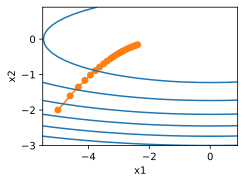

In [ ]:
import math
import torch
from d2l import torch as d2l

def adagrad_2d(x1, x2, s1, s2):
    eps = 1e-6
    g1, g2 = 0.2 * x1, 4 * x2
    s1 += g1 ** 2
    s2 += g2 ** 2
    x1 -= eta / math.sqrt(s1 + eps) * g1
    x2 -= eta / math.sqrt(s2 + eps) * g2
    return x1, x2, s1, s2

def f_2d(x1, x2):
    return 0.1 * x1 ** 2 + 2 * x2 ** 2

eta = 0.4
d2l.show_trace_2d(f_2d, d2l.train_2d(adagrad_2d))

**Hình ảnh**: Minh hoạ đường đi của adagrad  
_(Note: Original SVG reference: `Images/adagrad/adagrad_2d`)_

Để hiểu hình này, chúng ta cần phân tích 3 thành phần chính: Địa hình (các đường xanh), Hành trình (đường cam) và Tốc độ (khoảng cách giữa các điểm).

1. **Địa hình: Các đường đồng mức màu xanh**
   - Hình dáng: Đây là một cái bát hình elip bị kéo dãn.
   - Trục dọc ($x_2$): Có hệ số là 2 (lớn). Điều này nghĩa là hướng này rất dốc. Chỉ cần nhích nhẹ $x_2$, giá trị hàm số thay đổi rất mạnh. Các đường xanh nằm sát nhau biểu thị độ dốc lớn này.
   - Trục ngang ($x_1$): Có hệ số là 0.1 (nhỏ). Điều này nghĩa là hướng này rất thoải (phẳng). Các đường xanh nằm cách xa nhau.

2. **Hành trình: Đường màu cam (Quỹ đạo Adagrad)**

   Các chấm màu cam là vị trí của $(\mathbf{x}_1, \mathbf{x}_2)$ sau mỗi bước cập nhật (epoch). Đường nối chúng là đường đi của thuật toán.

   - Nếu dùng thuật toán thường (như SGD), vì trục dọc ($x_2$) quá dốc, thuật toán sẽ bị văng qua lại mạnh (zigzag) theo chiều dọc và đi rất chậm theo chiều ngang.
   - Adagrad thấy Gradient ở trục dọc ($x_2$) rất lớn $\rightarrow$ Nó tích lũy vào $\mathbf{s}_2$ $\rightarrow$ và chia learning rate cho số lớn này. Sau đó bước đi theo chiều dọc tự động nhỏ lại (Hãm phanh).
   - Adagrad thấy ở trục ngang ($x_1$) rất nhỏ $\rightarrow$ nên tích lũy vào $\mathbf{s}_1$ (số nhỏ) $\rightarrow$ và chia learning rate cho số nhỏ $\rightarrow$. Bước đi theo chiều ngang được giữ nguyên hoặc lớn hơn (Tăng tốc).
   - Kết quả: Ta thấy đường màu cam không bị zigzag hỗn loạn mà uốn cong một cách mượt mà về phía tâm. Nó đi cẩn thận ở chỗ nguy hiểm ($x_2$) và đi dứt khoát ở chỗ an toàn ($x_1$).

3. **Tốc độ: Khoảng cách giữa các chấm cam**

   Hãy nhìn kỹ các chấm cam:

   - Lúc đầu: Các chấm cách xa nhau (bước nhảy lớn).
   - Càng về sau: Các chấm xít lại gần nhau dày đặc (bước nhảy li ti).

   Lý do: Đây là minh chứng cho việc Learning Rate giảm dần (Decay).

   - Công thức cập nhật có mẫu số là $\sqrt{\mathbf{s}_t}$.
   - Vì $\mathbf{s}_t$ cứ cộng dồn mãi ($\mathbf{s}_t = \mathbf{s}_{t-1} + \mathbf{g}^2$), nên mẫu số càng ngày càng to.
   - Kết quả là càng về cuối, Adagrad càng "đuối sức", bước đi trở nên rất nhỏ, khiến nó mất nhiều thời gian để nhích từng chút một vào tâm điểm $(0,0)$.

### Xây dựng thuật toán Adagrad từ công thức

Chúng ta sẽ viết code Python từ đầu cho thuật toán Adagrad dựa trên những gì đã nhắc tới và huấn luyện mô hình

loss: 0.243, 0.038 sec/epoch


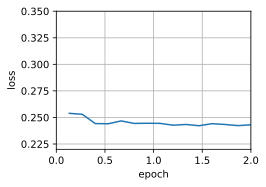

In [ ]:
import math
import torch
from d2l import torch as d2l
d2l.DATA_HUB['airfoil'] = (d2l.DATA_URL + 'airfoil_self_noise.dat',
                            '76e5be1548fd8222e5074cf0faae75edff8cf93f')

def get_data_ch11(batch_size=10, n=1500):
    """Defined in :numref:`sec_minibatches`"""
    data = np.genfromtxt(d2l.download('airfoil'),
                         dtype=np.float32, delimiter='\t')
    data = torch.from_numpy((data - data.mean(axis=0)) / data.std(axis=0))
    data_iter = d2l.load_array((data[:n, :-1], data[:n, -1]),
                               batch_size, is_train=True)
    return data_iter, data.shape[1]-1

def train_ch11(trainer_fn, states, hyperparams, data_iter, feature_dim, num_epochs=2):
    """Defined in :numref:`sec_minibatches`"""
    # Initialization
    w = torch.normal(mean=0.0, std=0.01, size=(feature_dim, 1),
                    requires_grad=True)
    b = torch.zeros((1), requires_grad=True)
    net, loss = lambda X: d2l.linreg(X, w, b), d2l.squared_loss

    # Train
    animator = d2l.Animator(xlabel='epoch', ylabel='loss', 
                            xlim=[0, num_epochs], ylim=[0.22, 0.35])
    n, timer = 0, d2l.Timer()
    for _ in range(num_epochs):
        for X, y in data_iter:
            l = loss(net(X), y).mean()
            l.backward()
            trainer_fn([w, b], states, hyperparams)
            n += X.shape[0]
            if n % 200 == 0:
                timer.stop()
                animator.add(n/X.shape[0]/len(data_iter),
                           (d2l.evaluate_loss(net, data_iter, loss),))
                timer.start()
    print(f'loss: {animator.Y[0][-1]:.3f}, {timer.sum()/num_epochs:.3f} sec/epoch')
    return timer.cumsum(), animator.Y[0]

def init_adagrad_states(feature_dim):
    s_w = torch.zeros((feature_dim, 1))
    s_b = torch.zeros(1)
    return (s_w, s_b)

def adagrad(params, states, hyperparams):
    eps = 1e-6
    for p, s in zip(params, states):
        with torch.no_grad():
            s[:] += torch.square(p.grad)
            p[:] -= hyperparams['lr'] * p.grad / torch.sqrt(s + eps)
        p.grad.data.zero_()
        
data_iter, feature_dim = d2l.get_data_ch11(batch_size=10)
d2l.train_ch11(adagrad, init_adagrad_states(feature_dim),
               {'lr': 0.1}, data_iter, feature_dim);

### Minh hoạ Adagrad trên tệp RCV1

Device đang chạy: cuda
Downloading/Loading RCV1...
Dataset Loaded. Samples: 23149, Features: 47236
--------------------------------------------------
Đang chạy Adagrad với LR=0.1...
Bắt đầu Training Pure ADAGRAD (Total samples: 23149)...
Epoch 1 | Sample 0/23149 | Loss: 0.6851
Epoch 1 | Sample 5000/23149 | Loss: 0.0247
Epoch 1 | Sample 10000/23149 | Loss: 0.0738
Epoch 1 | Sample 15000/23149 | Loss: 0.3000
Epoch 1 | Sample 20000/23149 | Loss: 0.1692
--> Kết thúc Epoch 1
Epoch 2 | Sample 0/23149 | Loss: 0.1036
Epoch 2 | Sample 5000/23149 | Loss: 0.1669
Epoch 2 | Sample 10000/23149 | Loss: 0.5818
Epoch 2 | Sample 15000/23149 | Loss: 0.0044
Epoch 2 | Sample 20000/23149 | Loss: 0.1906
--> Kết thúc Epoch 2
Epoch 3 | Sample 0/23149 | Loss: 0.0163
Epoch 3 | Sample 5000/23149 | Loss: 0.0138
Epoch 3 | Sample 10000/23149 | Loss: 0.2857
Epoch 3 | Sample 15000/23149 | Loss: 0.9627
Epoch 3 | Sample 20000/23149 | Loss: 0.0410
--> Kết thúc Epoch 3
Epoch 4 | Sample 0/23149 | Loss: 0.5175
Epoch 4 | Samp

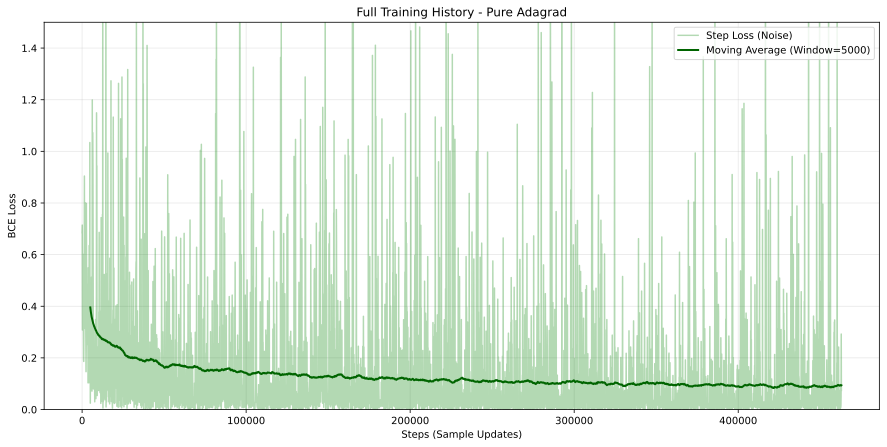

In [ ]:
import torch
import torch.nn as nn
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_rcv1

# 1. Setup & Load Data
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Device đang chạy: {device}")

print("Downloading/Loading RCV1...")
rcv1 = fetch_rcv1(subset='train')
n_samples, n_features = rcv1.data.shape

# Xử lý nhãn (Label Processing)
topic_counts = rcv1.target.sum(axis=0)
most_frequent_topic_idx = np.argmax(topic_counts)
y_full = rcv1.target[:, most_frequent_topic_idx].toarray().ravel()
y_cpu = torch.tensor(y_full, dtype=torch.float32).view(-1, 1)

print(f"Dataset Loaded. Samples: {n_samples}, Features: {n_features}")
print("-" * 50)

# 2. Hàm Train ADAGRAD
def train_adagrad_visualize(X_scipy, y_cpu, lr=0.01, epochs=1, epsilon=1e-8):
    # Khởi tạo tham số W và b
    W = torch.normal(0, 0.01, size=(n_features, 1), requires_grad=True, device=device)
    b = torch.zeros(1, requires_grad=True, device=device)

    # --- KHỞI TẠO BỘ NHỚ ADAGRAD (Accumulated Squared Gradients) ---
    G_W = torch.zeros_like(W, device=device)
    G_b = torch.zeros_like(b, device=device)

    criterion = nn.BCEWithLogitsLoss()
    step_losses = []

    print(f"Bắt đầu Training Pure ADAGRAD (Total samples: {n_samples})...")
    start_time = time.time()

    for epoch in range(epochs):
        indices = np.random.permutation(n_samples)
        for i, idx in enumerate(indices):
            # Lấy 1 mẫu (Stochastic)
            X_sample = torch.tensor(X_scipy[idx].toarray(), dtype=torch.float32).to(device)
            y_sample = y_cpu[idx].to(device).view(1, 1)

            # Forward
            linear_out = X_sample @ W + b
            loss = criterion(linear_out, y_sample)

            # Backward
            loss.backward()

            # --- CẬP NHẬT TRỌNG SỐ THEO CÔNG THỨC ADAGRAD ---
            with torch.no_grad():
                # 1. Cộng dồn bình phương gradient vào bộ nhớ (G_t = G_{t-1} + g_t^2)
                G_W += W.grad ** 2
                G_b += b.grad ** 2

                # 2. Tính mẫu số điều chỉnh (căn bậc hai của G + epsilon)
                std_W = torch.sqrt(G_W) + epsilon
                std_b = torch.sqrt(G_b) + epsilon

                # 3. Update tham số: W = W - (lr / std) * grad
                W -= (lr / std_W) * W.grad
                b -= (lr / std_b) * b.grad

                # 4. Reset gradient
                W.grad.zero_()
                b.grad.zero_()

            # Lưu lại loss
            current_loss = loss.item()
            step_losses.append(current_loss)

            # In tiến độ
            if i % 5000 == 0:
                print(f"Epoch {epoch+1} | Sample {i}/{n_samples} | Loss: {current_loss:.4f}")

        print(f"--> Kết thúc Epoch {epoch+1}")

    print(f"Tổng thời gian: {time.time() - start_time:.2f}s")
    return step_losses

# 3. Hàm Visualize
def plot_full_training_history(losses, alg_name="Adagrad", window_size=1000, downsample_rate=100):
    plt.figure(figsize=(15, 7))
    total_steps = len(losses)

    # Vẽ Loss thực tế (Downsampling)
    steps = range(0, total_steps, downsample_rate)
    sampled_losses = [losses[i] for i in steps]
    plt.plot(steps, sampled_losses, color='green', alpha=0.3, label='Step Loss (Noise)')

    # Vẽ Moving Average
    if total_steps > window_size:
        moving_avg = np.convolve(losses, np.ones(window_size)/window_size, mode='valid')
        ma_x_axis = range(window_size-1, total_steps)
        plt.plot(ma_x_axis[::downsample_rate], moving_avg[::downsample_rate],
                color='darkgreen', linewidth=2, label=f'Moving Average (Window={window_size})')

    plt.title(f'Full Training History - {alg_name}')
    plt.xlabel('Steps (Sample Updates)')
    plt.ylabel('BCE Loss')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.ylim(0, 1.5)
    plt.show()

# --- SỬ DỤNG ---
LR = 0.1  # Adagrad thích LR khởi đầu lớn hơn SGD
EPOCHS = 20

print(f"Đang chạy Adagrad với LR={LR}...")
loss_history_adagrad = train_adagrad_visualize(rcv1.data, y_cpu, lr=LR, epochs=EPOCHS)
plot_full_training_history(loss_history_adagrad, alg_name="Pure Adagrad", 
                           window_size=5000, downsample_rate=100)

## So sánh giữa Adagrad và SGD trên tệp RCV1

### Thiết lập Thực nghiệm

- **Tập dữ liệu:** RCV1 (Reuters Corpus Volume I).
- **Số lượng mẫu:** 23,149.
- **Số lượng đặc trưng:** 47,236 (Dữ liệu cao chiều và thưa).
- **Môi trường:** CUDA (GPU RTX3080).
- **Tham số:** Cả hai thuật toán được khởi chạy với cùng thiết lập learning rate ban đầu để đảm bảo tính công bằng trong so sánh.

### Kết quả Thực nghiệm

Dựa trên log huấn luyện qua 20 epochs, chúng tôi tổng hợp các chỉ số quan trọng tại các mốc thời gian đại diện trong bảng dưới đây.

### So sánh Loss và Độ ổn định giữa Adagrad và SGD qua các Epoch

| Metric | Epoch | Adagrad Loss | SGD Loss | Nhận xét |
|---|---|---|---|---|
| Khởi tạo | 1 | 0.6934 | 0.6814 | Tương đương |
| Hội tụ sớm | 3 | **0.0023** | 0.5129 | Adagrad hội tụ cực nhanh |
| Giữa kỳ | 12 | 0.1339 | **1.0979** | SGD bị văng (Spike) |
| Ổn định | 16 | 0.2659 | 0.1450 | Cả hai đều dao động |
| Kết thúc | 20 | **0.0017** | 0.2846 | Adagrad đạt tối ưu sâu hơn |
| **Thời gian** | Total | 538.94s | **496.02s** | SGD nhanh hơn $\approx$ 43s |

### So sánh giữa hai thuật toán tối ưu

#### Khả năng xử lý dữ liệu thưa (Sparsity Handling)

Tập dữ liệu RCV1 có đặc tính là các đặc trưng (từ vựng) xuất hiện với tần suất rất khác nhau.

- **SGD:** Sử dụng learning rate cố định cho toàn bộ 47,236 đặc trưng. Điều này dẫn đến việc các đặc trưng hiếm (rare features) không được cập nhật đủ lớn, trong khi các đặc trưng phổ biến lại bị cập nhật quá đà. Minh chứng rõ nhất là tại **Epoch 12**, SGD có loss vọt lên $1.0979$, cho thấy hiện tượng "overshooting" (văng khỏi đáy).

- **Adagrad:** Cơ chế $\frac{\eta}{\sqrt{\mathbf{s}_t}}$ cho phép thuật toán tự động gán learning rate lớn cho các tham số có gradient thưa thớt. Kết quả là ngay tại **Epoch 3**, Loss của Adagrad đã giảm sâu xuống $0.0023$, chứng tỏ khả năng "bắt" các đặc trưng quan trọng cực kỳ hiệu quả.

#### Độ ổn định hội tụ (Convergence Stability)

Quan sát hành vi loss ở 5 epoch cuối (16-20):

- **SGD:** Vẫn thể hiện sự bất ổn định cao với các giá trị loss dao động biên độ lớn (từ $0.06$ đến $0.93$ tại Epoch 18). Điều này cho thấy thuật toán vẫn đang dao động quanh vùng tối ưu mà không thể hội tụ chặt chẽ.

- **Adagrad:** Duy trì mức loss thấp và ổn định hơn. Mặc dù vẫn có dao động (do tính chất Stochastic), nhưng biên độ nhỏ hơn đáng kể. Điều này phù hợp với lý thuyết: learning rate của Adagrad giảm dần theo thời gian ($O(t^{-1/2})$), đóng vai trò như cơ chế "hãm phanh" (annealing) giúp thuật toán tinh chỉnh (fine-tune) chính xác vào điểm cực tiểu.

#### Chi phí tính toán (Computational Cost)

Về mặt thời gian thực thi:

$$T_{Adagrad} (538.94s) > T_{SGD} (496.02s)$$

Sự chênh lệch này là khoảng 8.6%. Nguyên nhân đến từ việc Adagrad phải duy trì và cập nhật thêm ma trận tích lũy gradient $\mathbf{s}_t$ và thực hiện phép tính căn bậc hai tại mỗi bước lặp. Tuy nhiên, xét trên hiệu quả hội tụ (đạt loss thấp nhanh gấp 4-5 lần), sự đánh đổi này là hoàn toàn xứng đáng.

## Bài tập -- Chương 11.7 Adagrad (D2L)

### Ghi chú

Ký hiệu: $\|\cdot\|_2$ là chuẩn Euclid; $\mathbf{I}$ là ma trận đơn vị; $\mathbf{Q}^\top$ là chuyển vị của $\mathbf{Q}$.

### Bài 1

**Đề bài.** Cho ma trận trực giao $\mathbf{U}$ và vector $\mathbf{c},\boldsymbol\delta$. Chứng minh

$$\|\mathbf{c}-\boldsymbol\delta\|_2 \;=\; \|\mathbf{U}\mathbf{c}-\mathbf{U}\boldsymbol\delta\|_2.$$

Tại sao điều này có nghĩa là độ lớn của nhiễu loạn không thay đổi sau khi thay đổi trực giao của các biến?

**Lời giải.** Đặt $\mathbf{v}=\mathbf{c}-\boldsymbol\delta$. Khi đó cần chứng minh

$$\|\mathbf{v}\|_2 = \|\mathbf{U}\mathbf{v}\|_2.$$

Ta có

$$\|\mathbf{U}\mathbf{v}\|_2^2 = (\mathbf{U}\mathbf{v})^\top(\mathbf{U}\mathbf{v})
= \mathbf{v}^\top \mathbf{U}^\top \mathbf{U} \mathbf{v}.$$

Vì $\mathbf{U}$ là ma trận trực giao nên $\mathbf{U}^\top\mathbf{U}=\mathbf{I}$. Do đó

$$\|\mathbf{U}\mathbf{v}\|_2^2 = \mathbf{v}^\top\mathbf{I}\mathbf{v} = \mathbf{v}^\top\mathbf{v} = \|\mathbf{v}\|_2^2.$$

Lấy căn bậc hai hai vế (cả hai không âm) thu được kết quả mong muốn:

$$\|\mathbf{U}\mathbf{v}\|_2 = \|\mathbf{v}\|_2.$$

_Giải thích ý nghĩa._ Ma trận trực giao là một isometry (phép giữ khoảng cách) trong không gian Euclid: nó biểu diễn các phép quay hoặc phản chiếu (hoặc tổ hợp của chúng) nên không thay đổi độ dài vector và góc giữa các vector. Vì vậy độ lớn của nhiễu (perturbation) $\mathbf{c}-\boldsymbol\delta$ không đổi khi ta thay đổi cơ sở bằng một biến đổi trực giao $\mathbf{U}$.

### Bài 2

**Đề bài.** Thử Adagrad với

$$f_1(\mathbf{x}) = 0.1\,x_1^2 + 2\,x_2^2$$

và với hàm đã xoay 45 độ

$$f_2(\mathbf{x}) = 0.1\,(x_1+x_2)^2 + 2\,(x_1-x_2)^2.$$

So sánh hành vi của Adagrad trên hai hàm này và giải thích.

#### 1. Phân tích lý thuyết

1. **Hessians và condition number.**

   $$\nabla^2 f_1 = \begin{pmatrix}0.2 & 0\\[4pt]0 & 4\end{pmatrix},
   \qquad
   \lambda_{\max}( \nabla^2 f_1 ) = 4,\quad
   \lambda_{\min}( \nabla^2 f_1 ) = 0.2,$$

   nên condition number $\kappa = 4 / 0.2 = 20$.

   Vì $f_2$ là $f_1$ sau một phép quay 45° (cụ thể tồn tại ma trận trực giao $Q$ sao cho $f_2(\mathbf{x})=f_1(Q\mathbf{x})$), nên Hessian của $f_2$ có cùng phổ (cùng các giá trị riêng) như của $f_1$. Về mặt phổ, hai hàm có cùng độ "khó" (cùng $\kappa$).

2. **Tính chất của Adagrad.**

   Adagrad duy trì cho mỗi toạ độ $i$ một accumulator:

   $$s_{t,i} = \sum_{\tau=1}^t g_{\tau,i}^2,$$

   và cập nhật theo:

   $$x_{t+1,i} = x_{t,i} - \eta \frac{g_{t,i}}{\sqrt{s_{t,i}} + \varepsilon}.$$

   Đây là phương pháp _coordinate-wise adaptive_: luật điều chỉnh learning-rate phụ thuộc vào lịch sử gradient tại từng tọa độ. Do đó Adagrad **không** bất biến dưới phép quay không gian tham số — nghĩa là nếu ta quay hệ tọa độ, ghi lại gradient theo các toạ độ mới, accumulator per-coordinate sẽ khác và cách cập nhật cũng khác.

3. **Hệ quả.**

   - Với $f_1$ (axis-aligned): gradient ở mỗi bước thường tập trung vào một toạ độ (do Hessian là đường chéo) — accumulator cho từng toạ độ sẽ phản ánh chính xác mức "stiffness" theo từng toạ độ, nên Adagrad có khả năng điều chỉnh tốt (giảm mạnh lr ở toạ độ có gradient lớn).

   - Với $f_2$ (xoay 45°): gradient của hàm tại mỗi bước thường phân phối qua cả hai toạ độ; do đó cả hai accumulator sẽ tăng theo cách khác, và sự điều chỉnh learning-rate theo toạ độ có thể kém "điểm rơi" hơn so với trường hợp trục-điều hướng, dẫn tới đường đi tối ưu hóa khác (và có thể chậm hoặc dao động hơn).

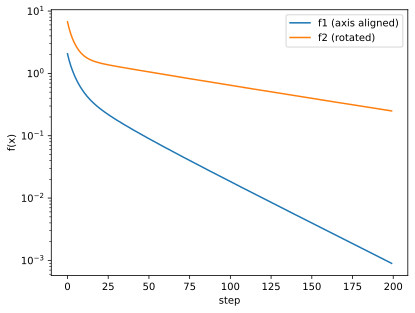

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def adagrad_step(x, grad, s, lr=0.1, eps=1e-8):
    s += grad**2
    x = x - lr * grad / (np.sqrt(s) + eps)
    return x, s

def f1(x):
    return 0.1*x[0]**2 + 2*x[1]**2

def grad_f1(x):
    return np.array([0.2*x[0], 4.0*x[1]])

def f2(x):
    # equivalent to f1(Q x) where Q is 45 degree rotation
    # f2(x) = 0.1*(x1+x2)^2 + 2*(x1-x2)^2
    g1 = 0.2*(x[0]+x[1]) + 4*(x[0]-x[1])
    g2 = 0.2*(x[0]+x[1]) - 4*(x[0]-x[1])
    return np.array([g1, g2])

# init
x0 = np.array([3.0, 1.0])
lr = 0.2
T = 200
eps = 1e-8

# run on f1
x = x0.copy()
s = np.zeros(2)
hist_f1 = []
for t in range(T):
    g = grad_f1(x)
    x, s = adagrad_step(x, g, s, lr, eps)
    hist_f1.append(0.1*x[0]**2 + 2*x[1]**2)

# run on f2
x = x0.copy()
s = np.zeros(2)
hist_f2 = []
for t in range(T):
    g = f2(x)
    x, s = adagrad_step(x, g, s, lr, eps)
    hist_f2.append(0.1*(x[0]+x[1])**2 + 2*(x[0]-x[1])**2)

plt.semilogy(hist_f1, label='f1 (axis aligned)')
plt.semilogy(hist_f2, label='f2 (rotated)')
plt.xlabel('step')
plt.ylabel('f(x)')
plt.legend()
plt.show()

### Bài 3

**Đề bài.** Chứng minh định lý vòng tròn Gerschgorin: với ma trận $\mathbf{M}=(m_{ij})\in\mathbb{C}^{n\times n}$, mọi giá trị riêng $\lambda$ của $\mathbf{M}$ thỏa mãn

$$|\lambda - m_{jj}|\le \sum_{k\ne j} |m_{jk}|$$

cho ít nhất một chỉ số $j$.

**Chứng minh.** Giả sử $\lambda$ là eigenvalue của $\mathbf{M}$ với eigenvector tương ứng $\mathbf{x}=(x_1,\dots,x_n)^\top\ne\mathbf{0}$. Chọn $j$ sao cho $|x_j|=\max_{1\le i\le n}|x_i| >0$. Từ phương trình $\mathbf{M}\mathbf{x}=\lambda\mathbf{x}$, lấy thành phần $j$ ta có

$$(\mathbf{M}\mathbf{x})_j =(\lambda x)_j \implies \sum_{k=1}^n m_{jk} x_k = \lambda x_j.$$

Chuyển số hạng $m_{jj}x_j$ sang vế trái:

$$\sum_{k\ne j} m_{jk} x_k = (\lambda - m_{jj}) x_j.$$

Lấy trị tuyệt đối cả hai vế và áp dụng bất đẳng thức tam giác:

$$|\lambda - m_{jj}|\,|x_j| \;=\; \left|\sum_{k\ne j} m_{jk} x_k\right|
\le \sum_{k\ne j} |m_{jk}|\,|x_k|.$$

Vì $|x_k|\le |x_j|$ theo cách chọn $j$, suy ra

$$|\lambda - m_{jj}|\,|x_j| \le \sum_{k\ne j} |m_{jk}|\,|x_j| = \left(\sum_{k\ne j} |m_{jk}|\right) |x_j|.$$

Chia cả hai vế cho $|x_j|>0$ được

$$|\lambda - m_{jj}| \le \sum_{k\ne j} |m_{jk}|.$$

Đó là điều phải chứng minh. $\square$

### Bài 4

**Đề bài.** Định lý Gerschgorin cho chúng ta biết gì về các trị riêng của ma trận tiền điều hòa theo đường chéo $\text{diag}^{-1/2}(\mathbf{M})\mathbf{M}\text{diag}^{-1/2}(\mathbf{M})$?

**Lời giải.**

#### 1. Xuất phát điểm

Công thức gốc trong tài liệu là:

$$\tilde{\mathbf{Q}} = \text{diag}^{-1/2}(\mathbf{Q}) \cdot \mathbf{Q} \cdot \text{diag}^{-1/2}(\mathbf{Q})$$

Để cho gọn, ta đặt ma trận đường chéo tỉ lệ $\mathbf{S} = \text{diag}^{-1/2}(\mathbf{Q})$. Khi đó:

$$\tilde{\mathbf{Q}} = \mathbf{S} \mathbf{Q} \mathbf{S}$$

#### 2. Định nghĩa các thành phần

Giả sử ma trận $\mathbf{Q}$ có kích thước bất kỳ.

- Ma trận $\mathbf{Q}$: phần tử hàng $i$, cột $j$ là $\mathbf{Q}_{ij}$.
- Ma trận $\mathbf{S}$ là ma trận đường chéo: $\mathbf{S}_{ii} = \frac{1}{\sqrt{\mathbf{Q}_{ii}}}$, $\mathbf{S}_{ij} = 0$ ($i \ne j$).

#### 3. Tính toán cụ thể

Xét ma trận:

$$\mathbf{Q} = \begin{pmatrix} 4 & 1 & 2 \\ 1 & 9 & 3 \\ 2 & 3 & 16 \end{pmatrix}$$

**Bước 1:** $\mathbf{S} = \begin{pmatrix} 1/2 & 0 & 0 \\ 0 & 1/3 & 0 \\ 0 & 0 & 1/4 \end{pmatrix}$

**Bước 2:** $\tilde{\mathbf{Q}} = \begin{pmatrix} 1 & 0.1667 & 0.25 \\ 0.1667 & 1 & 0.25 \\ 0.25 & 0.25 & 1 \end{pmatrix}$

#### Kết luận

Ma trận sau tiền điều hòa có:
- Đường chéo bằng 1
- Các phần tử ngoài đường chéo nhỏ hơn

Do đó theo Định lý Gerschgorin, các trị riêng đều gom quanh 1, tức condition number cải thiện đáng kể.

### Bài 5

**Đề bài.** Thử Adagrad cho một mạng sâu (ví dụ Fashion MNIST). Mô tả những gì nên thử và kỳ vọng.

#### 1. Mục tiêu thí nghiệm

Đánh giá hiệu năng của Adagrad trên bài toán phân loại hình ảnh Fashion MNIST với mạng CNN cơ bản, so sánh với các bộ tối ưu khác (SGD, SGD+momentum, RMSProp, Adam).

**Quan tâm tới:**
- Tốc độ hội tụ (train loss giảm theo epoch)
- Khả năng tổng quát hóa (validation accuracy)
- Hành vi learning-rate hiệu dụng per-parameter (accumulators)
- Tính nhạy với siêu tham số (lr ban đầu, epsilon)

#### 2. Chi tiết kiến trúc

**Dữ liệu:** Fashion MNIST (60k train, 10k test) với chuẩn hóa đơn giản (div 255)

**Kiến trúc CNN:**
```
Conv(32, 3x3) - ReLU - MaxPool(2x2)
Conv(64, 3x3) - ReLU - MaxPool(2x2)
Flatten - FC(128) - ReLU - FC(10)
```

**Siêu tham số:**
- batch_size = 64
- epochs = 20
- lr cho Adagrad: 0.01, 0.05, 0.1 (thử nhiều giá trị)
- epsilon = 1e-8

#### 3. Các thí nghiệm

1. **So sánh bộ tối ưu:** Chạy với Adagrad, SGD, SGD+momentum, RMSProp, Adam. Ghi lại train/val loss và accuracy.

2. **Nhạy cảm với lr:** Thử nhiều learning rate khởi điểm để đánh giá sensitivity.

3. **Đo accumulator:** Plot phân phối $s_{t,i}$ để xem parameter nào bị giảm lr nhiều.

4. **Kiểm tra overfitting:** So sánh learning curves.

5. **Data augmentation:** Thử với và không có augmentation.

#### 4. Kỳ vọng

**Ưu điểm Adagrad:**
- Tự động giảm lr cho tham số có gradient lớn
- Thích hợp với dữ liệu sparse hoặc đặc trưng hiếm

**Nhược điểm:**
- Accumulator cộng dồn vô hạn → learning rate giảm quá mức
- Training có thể dừng cải thiện sớm

**Dự đoán:** Adagrad hội tụ tốt ban đầu nhưng bị chững lại sau vài epoch. RMSProp/Adam thường cho kết quả tốt hơn về lâu dài.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import time

# --- 1. Thiết lập Device & Reproducibility ---
# Kiểm tra GPU (CUDA) hoặc MPS (cho Mac M1/M2) hoặc CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# --- 2. Chuẩn bị Dữ liệu ---
transform = transforms.Compose([transforms.ToTensor()])

# Tải dữ liệu (giữ nguyên logic)
trainset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
testset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(trainset, batch_size=64, shuffle=True)
test_loader = DataLoader(testset, batch_size=256, shuffle=False)

# --- 3. Định nghĩa Mô hình ---
class SimpleCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(1, 32, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 64, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64 * 7 * 7, 128),
            nn.ReLU(),
            nn.Linear(128, 10)
        )

    def forward(self, x):
        x = self.conv(x)
        x = self.fc(x)
        return x

model = SimpleCNN().to(device)

# [PyTorch 2.0 Optimization]
# torch.compile giúp tăng tốc độ train trên các GPU hỗ trợ (Linux/Windows)
# Nếu chạy lỗi trên môi trường cụ thể của bạn, có thể comment dòng này lại.
if hasattr(torch, 'compile'):
    print("Compiling model for PyTorch 2.0...")
    model = torch.compile(model)

# --- 4. Optimizer & Loss ---
optimizer = optim.Adagrad(model.parameters(), lr=0.05, eps=1e-8)
criterion = nn.CrossEntropyLoss()

# --- 5. Training & Evaluation Loops ---

def train_one_epoch():
    model.train()
    total_loss = 0.0
    for x, y in train_loader:
        x, y = x.to(device), y.to(device)
        
        # [PyTorch Optimization] set_to_none=True nhanh hơn gán = 0
        optimizer.zero_grad(set_to_none=True)
        
        out = model(x)
        loss = criterion(out, y)
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item() * x.size(0)
    return total_loss / len(train_loader.dataset)

def evaluate_model(): # Đổi tên từ eval -> evaluate_model để tránh trùng hàm built-in python
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for x, y in test_loader:
            x, y = x.to(device), y.to(device)
            out = model(x)
            pred = out.argmax(dim=1)
            correct += (pred == y).sum().item()
            total += y.size(0)
    return correct / total

# --- 6. Chạy Training ---
print("Start training...")
start_time = time.time()

for epoch in range(1, 21):
    tr_loss = train_one_epoch()
    val_acc = evaluate_model()
    print(f'Epoch {epoch:02d}: train_loss={tr_loss:.4f}, val_acc={val_acc:.4f}')

end_time = time.time()
print(f"Total training time: {end_time - start_time:.2f}s")

### Bài 6

**Đề bài.** Cần sửa đổi Adagrad như thế nào để có được sự phân rã (decay) tốt hơn/ổn hơn trong learning rate?

#### 1. Vấn đề của Adagrad gốc

Adagrad cộng dồn bình phương gradient vô hạn:

$$s_{t,i} = \sum_{\tau=1}^t g_{\tau,i}^2$$

Do $s_{t,i}$ tăng không giảm (non-decreasing) và có thể trở nên rất lớn, thành phần $\sqrt{s_{t,i}}$ giảm rất mạnh theo thời gian, có thể làm bước cập nhật gần bằng 0 trước khi tối ưu tìm tới cực tiểu tốt. Đây là quá trình phân rã quá hung hăng mà bài nói tới.

#### 2. Các sửa đổi phổ biến (chi tiết)

##### a. RMSProp: EMA của bình phương gradient

$$s_t = \beta s_{t-1} + (1-\beta) g_t^2, \quad \beta \in [0.9, 0.99]$$

Thay vì cộng dồn vô hạn, ta sử dụng trung bình mũ (exponential moving average) nên chỉ nhớ lịch sử gần đây. Điều này ngăn $s_t$ tăng lớn vô hạn và giúp learning-rate per-parameter ổn định hơn.

##### b. Adadelta

- Tổng loại bỏ dependency vào learning-rate toàn cục bằng cách sử dụng tỉ số giữa RMS của update và RMS của gradient:

$$\Delta \theta_t = -\frac{\text{RMS}[\Delta\theta]_{t-1}}{\text{RMS}[g]_t} g_t$$

- Adadelta dùng EMA cả cho gradient và cho update, tránh giảm lr quá mức.

##### c. Adam (với bias-correction)

$$m_t = \beta_1 m_{t-1} + (1-\beta_1) g_t$$
$$v_t = \beta_2 v_{t-1} + (1-\beta_2) g_t^2$$

Sau đó dùng dạng bias-corrected: $\hat{m}_t = \frac{m_t}{1-\beta_1^t}$ và $\hat{v}_t = \frac{v_t}{1-\beta_2^t}$.

Adam dùng EMA cho bình phương gradient như RMSProp và cả moment, dẫn đến ổn định hơn.

##### d. AdaBound

Giới hạn learning-rate per-parameter trong một khoảng thay đổi theo thời gian, tránh quá lớn hoặc quá nhỏ.

##### e. Tăng epsilon hoặc sử dụng smoothing

Dùng $\epsilon$ lớn hơn (ví dụ 1e-6 thay vì 1e-8) làm cho denominator không quá lớn ban đầu.

##### f. Sử dụng restart hoặc reset accumulator

Thỉnh thoảng reset $s_{t,i}$ về 0 hoặc nhân với factor nhỏ để tránh bị đóng băng.

##### g. Learning-rate schedule toàn cục kết hợp

Dùng lr schedule (decay chậm) trên lr ban đầu thay vì phụ thuộc hoàn toàn vào accumulator.

In [ ]:
# Ví dụ RMSProp thay cho Adagrad (numpy style đơn giản)
import numpy as np

def grad_f1(x):
    return np.array([0.2*x[0], 4.0*x[1]])

# RMSProp replacement for Adagrad
x = np.array([3.0, 1.0])
s = np.zeros_like(x)
lr = 0.01
rho = 0.9  # decay rate
eps = 1e-8

for t in range(100):
    g = grad_f1(x)  # giả sử grad_f1 đã định nghĩa
    s = rho * s + (1 - rho) * (g ** 2)
    x = x - lr * g / (np.sqrt(s) + eps)

print(f"Final x: {x}")
print(f"Final s (accumulator): {s}")

Final x: [1.94188379 0.08758652]
Final s (accumulator): [0.16641745 0.44378632]


#### 3. Khi nào nên dùng sửa đổi nào?

- **Nếu muốn sửa nhanh:** Chuyển sang **RMSProp** hoặc **Adam** - đây là lựa chọn thực tế và hiệu quả.

- **Nếu bài toán sparse** (ví dụ NLP với features hiếm): Adagrad gốc có thể vẫn tốt; nếu bị giảm quá mạnh, thử tăng epsilon hoặc reset accumulator.

- **Nếu cần kiểm soát chặt chẽ:** Dùng **AdaBound** hoặc clipping upper/lower bound cho lr per-parameter.

#### 4. Kết luận

Để giảm tính hung hăng của việc giảm learning-rate trong Adagrad, cách thực tế và phổ biến nhất là dùng **EMA của bình phương gradient** (RMSProp/Adam), hoặc dùng các biến thể như **Adadelta/AdaBound**. Nếu không muốn đổi thuật toán, thử chỉnh $\epsilon$, reset accumulator, hoặc áp một schedule nhân học cho learning-rate toàn cục.

# Tổng kết và Hướng phát triển

## Tóm tắt

### Tóm tắt lại hành trình

1. **Bài toán:** Tối ưu hóa $L(W)$.

2. **Thách thức:** Local Minima, Saddle Points, Vanishing Gradient.

3. **Giải pháp cơ bản:** Dùng SGD $\nabla L$.

4. **Hạn chế của SGD:** Vấn đề **Gradient Thưa**.

5. **Giải pháp thích ứng:** Adagrad.

## Các hướng cải tiến (Future Work)

Chỉ ra nhược điểm "dừng học sớm" của Adagrad chính là động lực cho các thuật toán tiếp theo.

### RMSProp

Giải quyết vấn đề $s_t$ tăng mãi bằng cách sử dụng _trung bình trượt theo hàm mũ (exponential moving average)_.

**Công thức:**

$$s_t = \beta s_{t-1} + (1-\beta) g_t^2$$

Thay vì tích lũy vô hạn như Adagrad ($s_t = s_{t-1} + g_t^2$), RMSProp chỉ "nhớ" lịch sử gần đây với tham số decay $\beta \in [0.9, 0.99]$.

**Ưu điểm:**
- Ngăn $s_t$ tăng lớn vô hạn
- Learning rate không giảm quá nhanh
- Phù hợp với non-stationary objectives

**Update rule:**

$$W_{t+1} = W_t - \frac{\eta}{\sqrt{s_t + \epsilon}} \odot g_t$$

### Adam (Adaptive Moment Estimation)

Kết hợp ý tưởng của RMSProp và Momentum.

**Công thức:**

**Moment bậc 1 (Momentum):**
$$m_t = \beta_1 m_{t-1} + (1-\beta_1) g_t$$

**Moment bậc 2 (RMSProp):**
$$v_t = \beta_2 v_{t-1} + (1-\beta_2) g_t^2$$

**Bias correction:**
$$\hat{m}_t = \frac{m_t}{1-\beta_1^t}, \quad \hat{v}_t = \frac{v_t}{1-\beta_2^t}$$

**Update rule:**
$$W_{t+1} = W_t - \frac{\eta}{\sqrt{\hat{v}_t} + \epsilon} \hat{m}_t$$

**Tham số mặc định:**
- $\beta_1 = 0.9$ (momentum)
- $\beta_2 = 0.999$ (RMSProp decay)
- $\eta = 0.001$ (learning rate)
- $\epsilon = 10^{-8}$

**Ưu điểm:**
- Kết hợp lợi ích của cả momentum và adaptive learning rate
- Bias correction giúp ổn định ở bước đầu
- Là optimizer phổ biến nhất trong deep learning hiện đại

## So sánh các thuật toán

| Thuật toán | Learning Rate | Momentum | Adaptive LR | Complexity |
|---|---|---|---|---|
| **SGD** | Cố định | ✗ | ✗ | $O(1)$ |
| **SGD + Momentum** | Cố định | ✓ | ✗ | $O(1)$ |
| **Adagrad** | Adaptive | ✗ | ✓ | $O(d)$ |
| **RMSProp** | Adaptive | ✗ | ✓ (với decay) | $O(d)$ |
| **Adam** | Adaptive | ✓ | ✓ (với decay) | $O(d)$ |

_Trong đó $d$ là số chiều của tham số._

### Khi nào dùng thuật toán nào?

- **SGD/SGD+Momentum:** Khi cần tốc độ nhanh, bộ nhớ thấp, hoặc muốn generalization tốt với learning rate schedule phù hợp.

- **Adagrad:** Dữ liệu sparse, NLP với features hiếm, không cần training lâu.

- **RMSProp:** Non-stationary objectives, RNN, hoặc khi Adagrad bị "đóng băng".

- **Adam:** Lựa chọn mặc định cho hầu hết các tác vụ deep learning, đặc biệt khi không muốn tune learning rate nhiều.

In [ ]:
import torch
import torch.optim as optim

# Giả sử có model
# model = YourModel()

# 1. SGD
optimizer_sgd = optim.SGD(model.parameters(), lr=0.01)

# 2. SGD with Momentum
optimizer_sgd_momentum = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# 3. Adagrad
optimizer_adagrad = optim.Adagrad(model.parameters(), lr=0.01, eps=1e-8)

# 4. RMSProp
optimizer_rmsprop = optim.RMSprop(model.parameters(), lr=0.001, alpha=0.99, eps=1e-8)

# 5. Adam (Most popular)
optimizer_adam = optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-8)

# 6. AdamW (Adam with weight decay fix)
optimizer_adamw = optim.AdamW(model.parameters(), lr=0.001, betas=(0.9, 0.999), 
                               eps=1e-8, weight_decay=0.01)

print("Các optimizer đã được khởi tạo!")
print("Lựa chọn phổ biến nhất: Adam hoặc AdamW")

## Kết luận

### Hành trình từ SGD đến Adam

Quá trình phát triển các thuật toán tối ưu trong deep learning là một chuỗi các cải tiến dần:

1. **SGD** → Đơn giản nhưng khó điều chỉnh learning rate
2. **SGD + Momentum** → Thêm "quán tính" giúp vượt qua local minima
3. **Adagrad** → Adaptive learning rate per-parameter, tốt cho sparse data
4. **RMSProp** → Khắc phục Adagrad bằng exponential decay
5. **Adam** → Kết hợp momentum + RMSProp + bias correction

### Bài học quan trọng

- Không có optimizer "tốt nhất" cho mọi bài toán
- Adam là lựa chọn an toàn cho hầu hết trường hợp
- SGD + Momentum vẫn được ưa chuộng khi cần generalization tốt
- Hiểu cơ chế hoạt động giúp debug và fine-tune hiệu quả hơn

### Xu hướng hiện tại

- **AdamW:** Cải thiện weight decay của Adam
- **LAMB, LARS:** Cho large-batch training
- **Lookahead, RAdam:** Cải thiện convergence và stability
- **Sharpness-Aware Minimization (SAM):** Tối ưu hóa theo "độ phẳng" của minima

Việc nghiên cứu và phát triển các thuật toán tối ưu mới vẫn đang tiếp diễn, nhằm cải thiện tốc độ hội tụ, độ ổn định, và khả năng tổng quát hóa của các mô hình deep learning.